<h1>Introduction</h1>
<p>L'accident vasculaire cérébral (AVC) est une maladie qui affecte les artères menant au cerveau et à l'intérieur de celui-ci. Un AVC survient lorsqu'un vaisseau sanguin transportant l'oxygène et les nutriments vers le cerveau est soit obstrué par un caillot, soit rompu.</p>
<p>Selon l'Organisation mondiale de la santé (OMS), l'AVC est la deuxième cause de mortalité dans le monde, responsable d'environ 11 % des décès totaux. Cet ensemble de données est utilisé pour prédire la probabilité qu'un patient subisse un AVC en fonction de paramètres d'entrée tels que le sexe, l'âge, diverses maladies et le statut tabagique. Chaque ligne des données fournit des informations pertinentes sur le patient.</p>

## 0. Importer les bibliothèques

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import IsolationForest
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from scipy.stats import mstats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import QuantileTransformer


## 1. Charger  l'ensemble de données

In [41]:
# 1. Charger  l'ensemble de données
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

## 2. Informations sur l'ensemble de données
### 2-1. Titres des colonnes

In [42]:
data.columns.array

<NumpyExtensionArray>
[               'id',            'gender',               'age',
      'hypertension',     'heart_disease',      'ever_married',
         'work_type',    'Residence_type', 'avg_glucose_level',
               'bmi',    'smoking_status',            'stroke']
Length: 12, dtype: object

Description des Variables du Dataset AVC :
* id : Identifiant unique (numérique)
* gender : Sexe (Homme, Femme, Autre) (catégorique)
* age : Âge du patient (numérique)
* hypertension : 0, 1 (catégorique)
* heart_disease : 0, 1 (catégorique)
* ever_married : Oui, Non (catégorique)
* work_type : Privé, Indépendant, enfants, Emploi_gouvernemental, Jamais_travaillé (catégorique)
* Residence_type : Urbain, Rural (catégorique)
* avg_glucose_level : Niveau moyen de glucose (numérique)
* bmi : Indice de masse corporelle (numérique, avec des valeurs manquantes)
* smoking_status : jamais fumé, Inconnu, anciennement fumé, fume (catégorique)
* stroke : Variable cible, 0 ou 1 (catégorique)

### 2-2.Aperçu de l'ensemble de données 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* Nombre total d'observations : 5110
* Nombre total de colonnes : 12

### Informations sur les Colonnes

| Colonne            | Type de Données | Description                              | Valeurs Manquantes |
|--------------------|-----------------|------------------------------------------|--------------------|
| id                | int64           | Identifiant unique                      | 0                  |
| gender            | object          | Sexe (Homme, Femme, Autre)              | 0                  |
| age               | float64         | Âge du patient                          | 0                  |
| hypertension      | int64           | Présence d'hypertension (0,1)           | 0                  |
| heart_disease     | int64           | Présence de maladie cardiaque (0,1)     | 0                  |
| ever_married      | object          | Statut marital (Oui, Non)               | 0                  |
| work_type         | object          | Type de travail                         | 0                  |
| Residence_type    | object          | Type de résidence (Urbain, Rural)       | 0                  |
| avg_glucose_level | float64         | Niveau moyen de glucose                 | 0                  |
| bmi               | float64         | Indice de masse corporelle              | 201                |
| smoking_status    | object          | Statut tabagique                        | 0                  |
| stroke            | int64           | Cible : AVC (0,1)                       | 0                  |

**Observation** : La colonne `bmi` contient 201 valeurs manquantes, soit environ 3,9 % des données. Ces valeurs manquantes devront être traitées avant la modélisation.


### 2-3.Statistiques descriptives

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### 2-4. Répartition des valeurs par colonne catégorique et numérique

In [45]:
# Liste des colonnes
all_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# 2-14. Visualisation simple et séparée pour chaque colonne

# Étape 1 : Visualisation des variables catégoriques avec des Donut Charts (séparés par paires)
# Regrouper les colonnes catégoriques par paires
pairs = [categorical_cols[i:i+2] for i in range(0, len(categorical_cols), 2)]

# Créer un graphique séparé pour chaque paire
for pair in pairs:
    # Créer une grille de sous-graphiques pour la paire (1 ligne, 2 colonnes)
    fig = make_subplots(
        rows=1,
        cols=len(pair),
        subplot_titles=pair,
        specs=[[{'type': 'pie'} for _ in range(len(pair))]],
        horizontal_spacing=0.1
    )

    # Ajouter un Donut Chart pour chaque variable dans la paire
    for idx, col in enumerate(pair):
        # Calculer les fréquences et pourcentages
        value_counts = data[col].value_counts()
        total = value_counts.sum()
        percentages = (value_counts / total * 100).round(2)

        # Définir la position de la légende en fonction de l'index
        legend_x = -0.3 if idx == 0 else 1.05  # À gauche pour le premier, à droite pour le second
        legend_y = 0.5
        legendgroup = f'group_{col}'  # Groupe de légende unique pour chaque donut chart

        # Ajouter le Donut Chart
        fig.add_trace(
            go.Pie(
                labels=value_counts.index,
                values=value_counts.values,
                hole=0.4,
                textinfo='label+percent',
                textposition='inside',
                marker=dict(colors=px.colors.qualitative.Pastel),
                hoverinfo='label+percent+value',
                showlegend=True,
                name=col,  # Nom pour la légende
                legendgroup=legendgroup,  # Associer à un groupe de légende
                legendgrouptitle_text=col  # Titre du groupe de légende
            ),
            row=1,
            col=idx + 1
        )

    # Ajuster la mise en page
    fig.update_layout(
        title=f"Répartition de {pair[0]} et {pair[1] if len(pair) > 1 else ''}",
        title_font_size=16,
        height=400,
        width=900,  # Augmenter la largeur pour laisser de l'espace pour les légendes
        margin=dict(t=100, b=50, l=150, r=150),  # Ajuster les marges pour les légendes
        showlegend=True,
        # Définir les positions des légendes pour chaque groupe
        legend=dict(
            x=-0.3,
            y=0.5,
            orientation='v',
            font=dict(size=12),
            tracegroupgap=10
        ),
        legend2=dict(
            x=1.05,
            y=0.5,
            orientation='v',
            font=dict(size=12),
            tracegroupgap=10
        )
    )
    # Associer les légendes aux groupes correspondants
    for trace in fig.data:
        if trace.name == pair[0]:
            trace.legend = 'legend'  # Première légende (à gauche)
        else:
            trace.legend = 'legend2'  # Deuxième légende (à droite)

    fig.show()

# Étape 2 : Visualisation des variables numériques avec des histogrammes et KDE (inchangée)
for col in numerical_cols:
    # Créer un histogramme avec une courbe KDE, coloré par stroke
    fig = px.histogram(
        data,
        x=col,
        color='stroke',
        marginal='rug',  # Ajoute des marques sur l'axe pour chaque point
        histnorm='probability density',  # Normalise pour comparer les densités
        opacity=0.7,
        color_discrete_map={0: '#1f77b4', 1: '#ff7f0e'},
        labels={col: col.replace('_', ' ').title(), 'stroke': 'AVC'},
        title=f"Distribution de {col} (colorée par stroke)"
    )
    # Ajouter une courbe KDE
    fig.update_traces(
        histfunc='count',
        hovertemplate='<b>%{x}</b><br>Probabilité: %{y:.2f}<br>',
        selector=dict(type='histogram')
    )
    fig.update_layout(
        height=500,
        title_font_size=16,
        xaxis_title=col.replace('_', ' ').title(),
        yaxis_title="Densité",
        bargap=0.1,
        showlegend=True,
        margin=dict(t=50, b=50)
    )
    fig.show()

Voici une interprétation des visualisations :

### 1. **Répartition des Variables Catégoriques (Donut Charts)**

- **Gender** : 58,6 % de femmes, 41,4 % d'hommes, et 0,02 % "Other". La catégorie "Other" est négligeable, on peut la supprimer.
- **Hypertension** : 90,3 % n'ont pas d'hypertension, 9,7 % en ont. Cela montre une faible prévalence.
- **Heart Disease** : 94,6 % n'ont pas de maladie cardiaque, 5,4 % en ont. Prévalence encore plus faible.
- **Ever Married** : 65,6 % sont mariés, 34,4 % ne le sont pas. Les mariés sont majoritaires.
- **Work Type** : 57,2 % travaillent dans le privé, 16 % sont indépendants, 13,4 % sont enfants, 12,9 % ont un emploi gouvernemental, et 0,4 % n'ont jamais travaillé. Forte représentation du secteur privé.
- **Residence Type** : 50,8 % urbains, 49,2 % ruraux. Répartition presque équilibrée.
- **Smoking Status** : 37 % n'ont jamais fumé, 30,2 % "Unknown", 17,3 % anciennement fumé, 15,4 % fument. La catégorie "Unknown" est problématique (30,2 %).
- **Stroke** : 95,1 % n'ont pas eu d'AVC, 4,9 % en ont eu. Forte déséquilibre, nécessitant une gestion (ex. SMOTE).

### 2. **Distribution des Variables Numériques (Histogrammes)**

- **Age (colorée par stroke)** :
  - Les cas d'AVC (orange) sont majoritairement concentrés chez les patients plus âgés (>50 ans), avec un pic notable autour de 80 ans. Très peu d'AVC chez les jeunes (<20 ans).

- **Avg Glucose Level (colorée par stroke)** :
  - Les AVC (orange) sont présents à la fois dans les niveaux normaux et élevés.

- **BMI (colorée par stroke)** :
  - Pas de différence nette entre AVC et non-AVC en fonction de l'IMC.



### 2-5. Histogrammes de distribution des variables

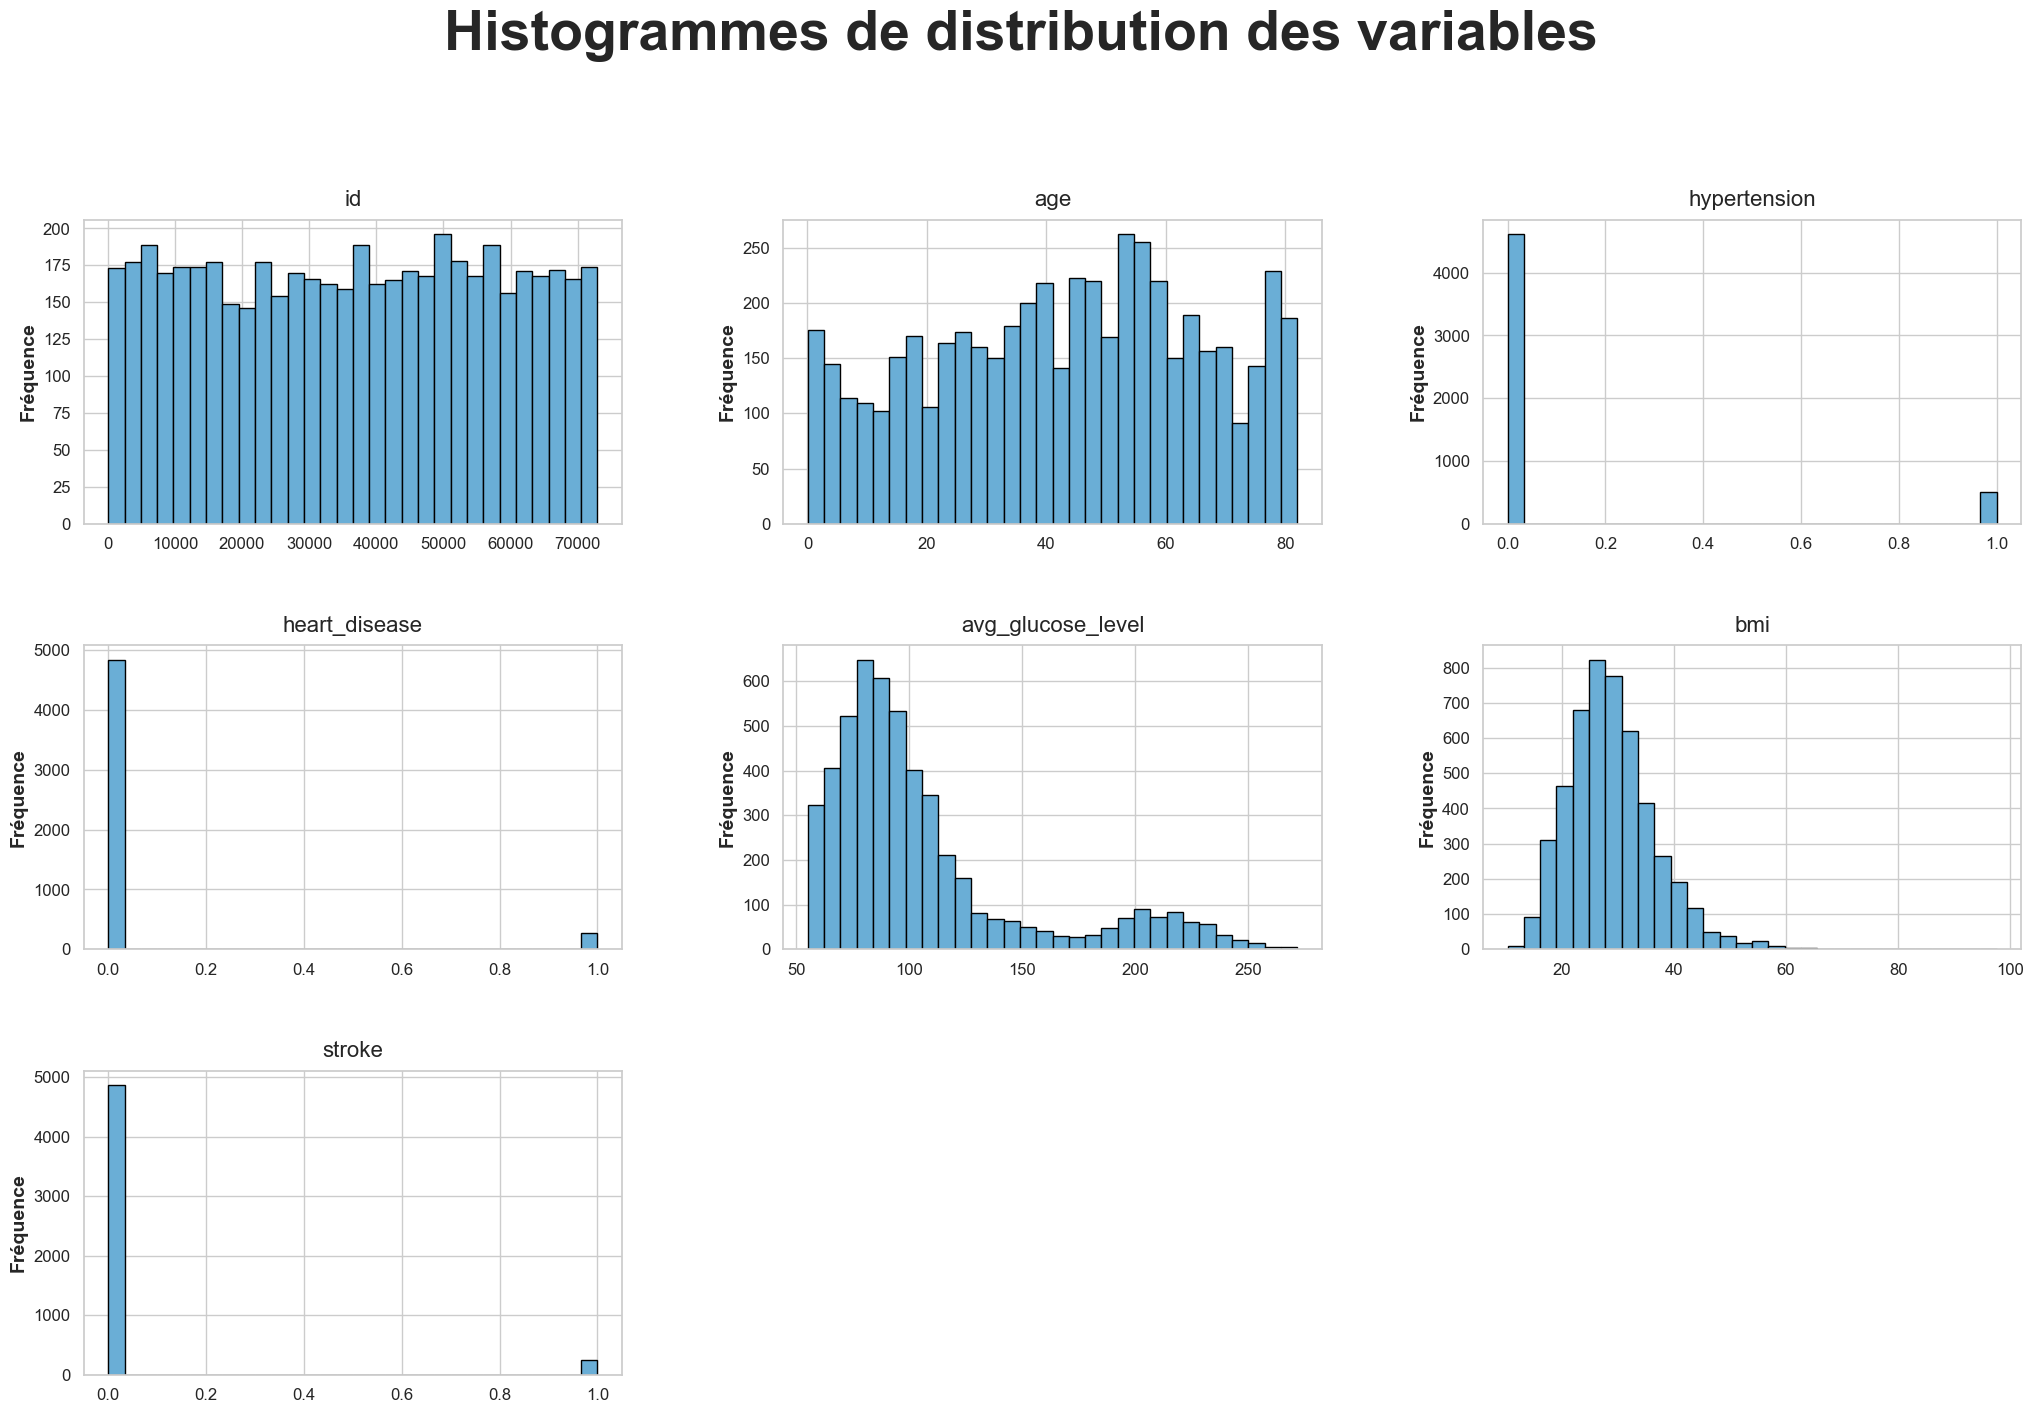

In [46]:
# Définir un style avec seaborn
sns.set_style("whitegrid")

# Créer les histogrammes 
fig = data.hist(figsize=(25, 15), bins=30, edgecolor="black", color=sns.color_palette("Blues", 1)[0])

# Ajouter une grille légère et un titre principal
plt.grid(True, axis="both", alpha=0.3, linestyle='--')
plt.suptitle("Histogrammes de distribution des variables", fontsize=40, y=1.02, weight='bold')

# Ajuster l'espace entre les sous-graphiques
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Personnaliser les étiquettes et titres des axes pour chaque sous-graphique
for ax in fig.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14, weight='bold')
    ax.set_ylabel("Fréquence", fontsize=14, weight='bold')
    ax.set_title(ax.get_title(), fontsize=16, pad=10)
    ax.tick_params(axis='both', labelsize=12)

plt.show()

## Interprétation des histogrammes de distribution des variables numériques :

### 1. **age** (Âge)
- **Plage** : 0,08 à 82 ans.
- **Fréquence max** : ~250 observations autour de 40-60 ans.
- **Interprétation** : Distribution bimodale (pics à 0-20 ans et 40-60 ans). Les âges sont bien répartis, mais les personnes âgées sont plus nombreuses, ce qui est pertinent pour les AVC.

### 2. **hypertension** (Hypertension)
- **Valeurs** : 0 (90,3 %, ~4612) et 1 (9,7 %, ~498).
- **Fréquence max** : ~4500 pour 0.
- **Interprétation** : Forte déséquilibre, peu de patients hypertendus, mais ceux-ci pourraient être à risque d’AVC.

### 3. **heart_disease** (Maladie Cardiaque)
- **Valeurs** : 0 (94,6 %, ~4834) et 1 (5,4 %, ~276).
- **Fréquence max** : ~4800 pour 0.
- **Interprétation** : Très déséquilibré, faible prévalence des maladies cardiaques, mais potentiellement un facteur de risque clé.

### 4. **avg_glucose_level** (Niveau de Glucose)
- **Plage** : 55,12 à 271,74 mg/dL.
- **Fréquence max** : ~600 autour de 70-100 mg/dL.
- **Interprétation** : Distribution asymétrique à droite, avec une longue queue (valeurs élevées). Les niveaux élevés (>150) sont rares mais pourraient indiquer un risque d’AVC.

### 5. **bmi** (IMC)
- **Plage** : 10,3 à 97,6.
- **Fréquence max** : ~700 autour de 25-30.
- **Interprétation** : Distribution légèrement asymétrique à droite, centrée autour de 28 (moyenne). Quelques valeurs extrêmes (>60) à considérer comme outliers.

### 6. **stroke** (AVC, Cible)
- **Valeurs** : 0 (95,1 %, ~4861) et 1 (4,9 %, ~249).
- **Fréquence max** : ~4800 pour 0.
- **Interprétation** : Très déséquilibré, avec peu de cas d’AVC. Nécessite une gestion (ex. SMOTE) pour la modélisation.

### 2-6. Décompte des valeurs manquantes

In [47]:
missing_values = data.isnull().sum()
missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values
})

# Affichage stylisé pour Jupyter
styled_missing = missing_df.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', 'green'), ('border', '1px solid black')]}
]).set_caption('Décompte des valeurs manquantes"').highlight_max(subset=['Valeurs manquantes'], color='lightcoral')
display(styled_missing)


,Colonne,Valeurs manquantes
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,201


### Décompte des Valeurs Manquantes

- **bmi** : 201 valeurs manquantes (3,9 % des données sur 5110 observations).
- **Autres colonnes** : Aucune valeur manquante (0 partout).


### 2-6-1. Vérification détaillée des valeurs manquantes

In [48]:
print("Note : True indique une valeur manquante, False une valeur présente.")
data.isnull()

Note : True indique une valeur manquante, False une valeur présente.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


### 2-6-2.Graphique des valeurs manquantes par colonne

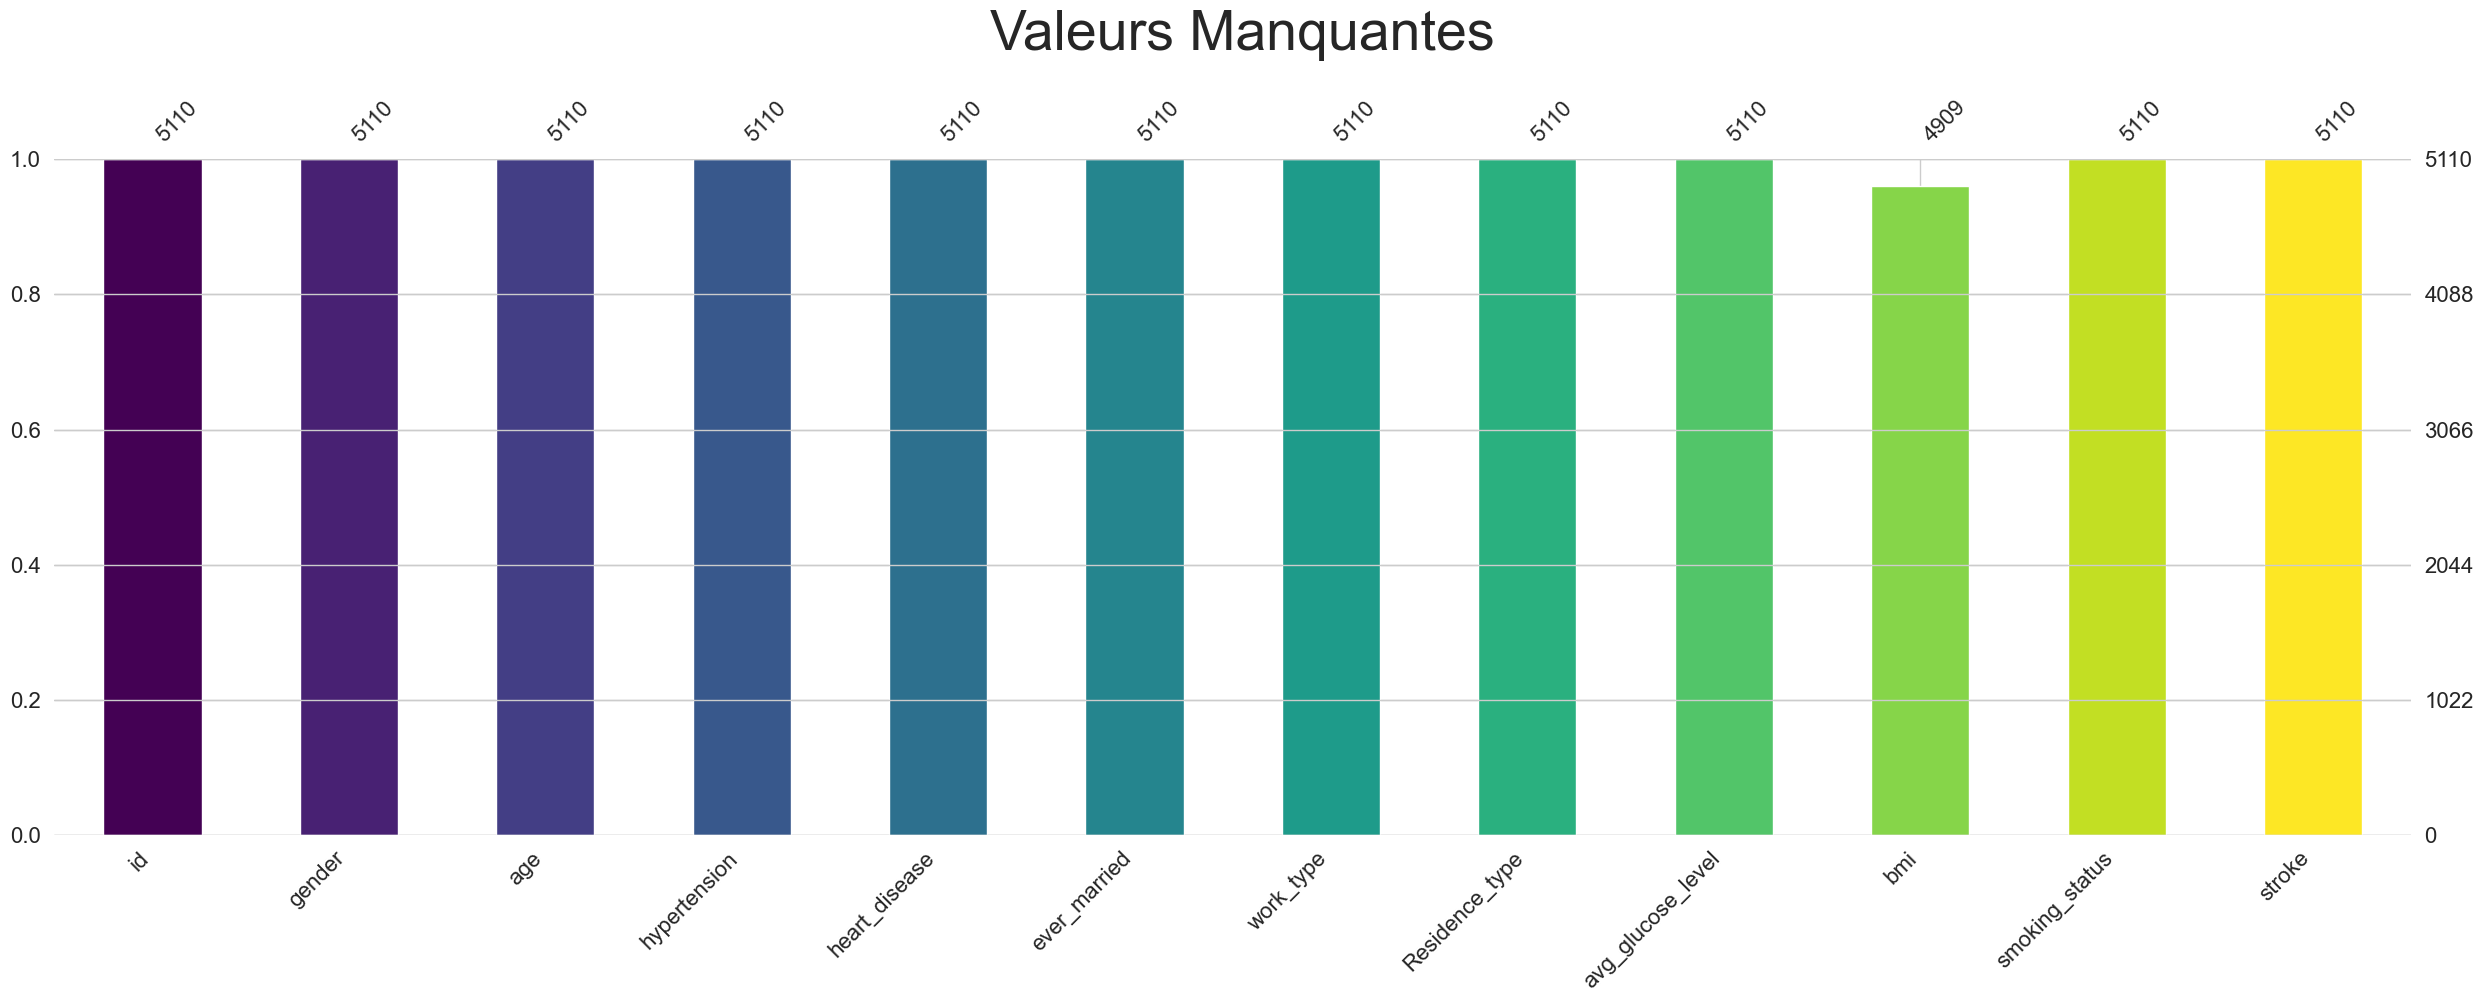

In [49]:
num_columns = len(data.columns)
colors = plt.cm.viridis(np.linspace(0,1, num_columns)) 
msno.bar(data, color = colors)
plt.suptitle("Valeurs Manquantes", fontsize = 40, y = 1)
plt.tight_layout()
plt.show()

### 2-7. Matrice de corrélation des variables numériques

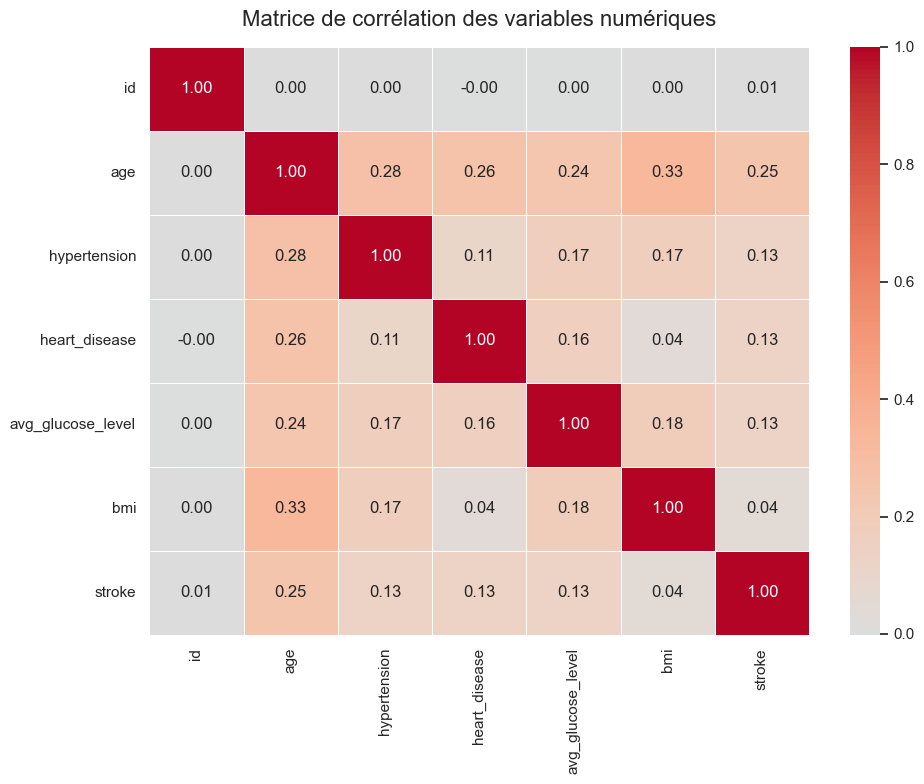

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation des variables numériques", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

### Interprétation de la Matrice de Corrélation des Variables Numériques
**Conclusion** : L’âge est le prédicteur le plus corrélé avec les AVC, suivi par l’hypertension, les maladies cardiaques et le glucose. Les corrélations globales sont faibles, suggérant des relations complexes nécessitant des transformations ou des interactions pour la modélisation. Pas de multicolinéarité préoccupante.

### 2-8. Verification des outliers 

In [51]:
# Fonction pour détecter les outliers avec la méthode IQR
def detect_outliers_iqr(data, columns):
    outliers_dict = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        outliers_dict[col] = outliers
    return outliers_dict

# Fonction pour détecter les outliers avec Isolation Forest
def detect_outliers_isolation_forest(data, columns, contamination=0.05):
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    X = data[columns].dropna()
    labels = iso_forest.fit_predict(X)
    outliers = X[labels == -1]
    return outliers

# Fonction pour afficher un résumé stylisé des outliers
def display_outliers_summary(outliers_dict, method_name):
    summary = pd.DataFrame({
        'Colonne': list(outliers_dict.keys()),
        'Nombre d\'outliers': [len(outliers_dict[col]) for col in outliers_dict.keys()],
        'Exemples d\'outliers': [outliers_dict[col].values[:5] for col in outliers_dict.keys()]
    })
    print(f"\nRésumé des valeurs aberrantes ({method_name}) :")
    print(summary.to_string(index=False))
    
    # Affichage stylisé pour Jupyter
    styled_summary = summary.style.set_properties(**{
        'text-align': 'center',
        'border': '1px solid black',
        'padding': '5px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('background-color', 'green'), ('border', '1px solid black')]}
    ]).set_caption(f"Résumé des valeurs aberrantes ({method_name})")
    display(styled_summary)

# 2-12. Vérification des valeurs aberrantes dans les variables numériques
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Étape 1 : Détection des outliers avec IQR
outliers_iqr = detect_outliers_iqr(data, numerical_cols)
display_outliers_summary(outliers_iqr, "Méthode IQR")

# Étape 2 : Détection des outliers avec Isolation Forest
outliers_iso = detect_outliers_isolation_forest(data, numerical_cols)
print("\nOutliers détectés avec Isolation Forest :")
print(outliers_iso.head())

# Étape 3 : Visualisation interactive avec Plotly (Boxplots)
fig = go.Figure()
for i, col in enumerate(numerical_cols):
    fig.add_trace(go.Box(y=data[col], name=col, marker_color=f'rgb({i*80}, 150, 200)', boxpoints='outliers'))
fig.update_layout(
    title="Détection interactive des valeurs aberrantes dans les variables numériques",
    yaxis_title="Valeur",
    xaxis_title="Variable",
    title_font_size=16,
    margin=dict(t=50, b=50),
    showlegend=False
)
fig.show()



Résumé des valeurs aberrantes (Méthode IQR) :
          Colonne  Nombre d'outliers                      Exemples d'outliers
              age                  0                                       []
avg_glucose_level                627 [228.69, 202.21, 171.23, 174.12, 186.21]
              bmi                110           [48.9, 56.6, 50.1, 54.6, 60.9]


,Colonne,Nombre d'outliers,Exemples d'outliers
0,age,0,[]
1,avg_glucose_level,627,[228.69 202.21 171.23 174.12 186.21]
2,bmi,110,[48.9 56.6 50.1 54.6 60.9]



Outliers détectés avec Isolation Forest :
     age  avg_glucose_level   bmi
21  52.0             233.29  48.9
22  79.0             228.70  26.6
23  82.0             208.30  32.5
30  57.0             212.08  44.2
32  82.0             196.92  22.2


### Détection Interactive des Valeurs Aberrantes dans les Variables Numériques

#### Interprétation dans le Contexte des Outliers :
- **Âge** : Boxplot montre une distribution de 0,08 à 82 ans, sans outliers (médiane : 45 ans). Aucune valeur aberrante significative.
- **Niveau de Glucose Moyen** : Large dispersion (55,12 à 271,74, médiane : 91,89). De nombreux outliers (627 identifiés) au-delà de 168,68, indiquant des niveaux de glucose extrêmes (diabète sévère).
- **IMC (bmi)** : Distribution de 10,3 à 97,6 (médiane : 28,1), avec 126 outliers au-delà de 47,5, reflétant des cas d’obésité extrême.

#### Conclusion :
`avg_glucose_level` et `bmi` présentent des outliers significatifs (627 et 110), pouvant influencer les modèles, mais `age` reste stable sans outliers.

## 3. Nettoyage des données

### 3.1 Supprimer et remplacer les données inutiles

In [52]:
print("\n=== Suppression et remplacement des données inutiles ===")
data.drop(columns=["id"], inplace=True)  # Colonne inutile
data["gender"] = data["gender"].replace("Other", "Male")  # Remplacer 1 valeur "Other" par "Male"
print("Valeurs de 'gender' après remplacement :")
print(data["gender"].value_counts())


=== Suppression et remplacement des données inutiles ===
Valeurs de 'gender' après remplacement :
gender
Female    2994
Male      2116
Name: count, dtype: int64


### 3.2 Remplir les valeurs manquantes

Avant - Valeurs manquantes dans bmi: 201

=== Remplissage des valeurs manquantes ===
Valeurs manquantes après remplissage :
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Après - Valeurs manquantes dans bmi: 0


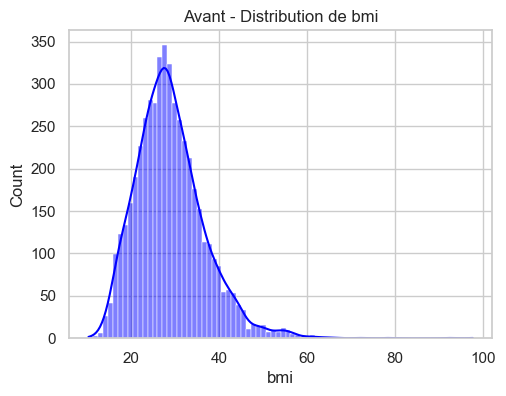

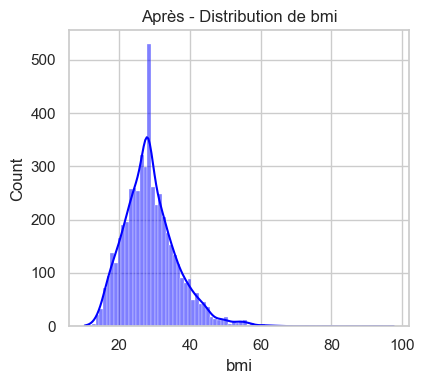

In [53]:
# 1. Gestion des Valeurs Manquantes (bmi)
print("Avant - Valeurs manquantes dans bmi:", data['bmi'].isnull().sum())
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['bmi'], kde=True, color='blue')
plt.title("Avant - Distribution de bmi")
print("\n=== Remplissage des valeurs manquantes ===")
for col in data.columns:
    if data[col].dtype == "int64" or data[col].dtype == "float64":
        data[col] = data[col].fillna(data[col].median())  # Utiliser la médiane à cause des outliers
    if data[col].dtype == "object":
        data[col] = data[col].fillna("UNKNOWN")
        
print("Valeurs manquantes après remplissage :")
print(data.isnull().sum())
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
print("Après - Valeurs manquantes dans bmi:", data['bmi'].isnull().sum())
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['bmi'], kde=True, color='blue')
plt.title("Après - Distribution de bmi")
plt.tight_layout()
plt.show()

### 3.3 Prédire les valeurs "Unknown" dans smoking_status

In [54]:
# Liste des colonnes catégoriques
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status', 'stroke']

print("=== Prédiction des valeurs 'Unknown' dans smoking_status ===")
# Vérifier la présence de "Unknown" dans smoking_status
unknown_count = (data['smoking_status'] == 'Unknown').sum()
print(f"Nombre de valeurs 'Unknown' dans smoking_status : {unknown_count}")

if unknown_count > 0:
    # Séparer les données avec et sans "Unknown"
    data_known = data[data['smoking_status'] != 'Unknown']
    data_unknown = data[data['smoking_status'] == 'Unknown']

    # Encoder les variables pour le modèle d'imputation
    X_known = data_known.drop(columns=['smoking_status'])
    y_known = data_known['smoking_status']
    X_unknown = data_unknown.drop(columns=['smoking_status'])

    # Définir toutes les colonnes catégoriques à encoder (exclure smoking_status)
    categorical_cols_to_encode = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                                  'work_type', 'Residence_type','stroke']

    # Encoder les variables catégoriques avec pd.get_dummies pour l'imputation
    X_known_encoded = pd.get_dummies(X_known, columns=categorical_cols_to_encode)
    X_unknown_encoded = pd.get_dummies(X_unknown, columns=categorical_cols_to_encode)

    # Aligner les colonnes de X_unknown_encoded sur celles de X_known_encoded
    X_unknown_encoded = X_unknown_encoded.reindex(columns=X_known_encoded.columns, fill_value=0)

    # Entraîner un modèle pour prédire smoking_status
    model_imputation = LogisticRegression(max_iter=5000, random_state=42)
    model_imputation.fit(X_known_encoded, y_known)

    # Prédire les valeurs "Unknown"
    predicted_smoking_status = model_imputation.predict(X_unknown_encoded)

    # Remplacer les "Unknown" par les valeurs prédites directement dans data
    data.loc[data['smoking_status'] == 'Unknown', 'smoking_status'] = predicted_smoking_status

    # Vérifier la distribution après imputation
    print("Distribution de 'smoking_status' après imputation :")
    print(data['smoking_status'].value_counts(normalize=True))
else:
    print("Aucune valeur 'Unknown' à imputer dans smoking_status.")

=== Prédiction des valeurs 'Unknown' dans smoking_status ===
Nombre de valeurs 'Unknown' dans smoking_status : 1544
Distribution de 'smoking_status' après imputation :
smoking_status
never smoked       0.663209
formerly smoked    0.182192
smokes             0.154599
Name: proportion, dtype: float64


## 4. EDA

### 4.1 Visualisation Univariée des Variables selon Stroke et Non-Stroke

In [55]:
all_cols = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Filter the data for individuals with stroke == 1
data_stroke = data[data['stroke'] == 1]

# Étape 1 : Visualisation des variables catégoriques avec des Donut Charts (séparés par paires)
# Regrouper les colonnes catégoriques par paires
pairs = [categorical_cols[i:i+2] for i in range(0, len(categorical_cols), 2)]

# Créer un graphique séparé pour chaque paire
for pair in pairs:
    # Créer une grille de sous-graphiques pour la paire (1 ligne, 2 colonnes)
    fig = make_subplots(
        rows=1,
        cols=len(pair),
        subplot_titles=[f"{col} (AVC = 1)" for col in pair],
        specs=[[{'type': 'pie'} for _ in range(len(pair))]],
        horizontal_spacing=0.1
    )

    # Ajouter un Donut Chart pour chaque variable dans la paire
    for idx, col in enumerate(pair):
        # Calculer les fréquences et pourcentages pour les individus avec stroke == 1
        value_counts = data_stroke[col].value_counts()
        total = value_counts.sum()
        percentages = (value_counts / total * 100).round(2)

        # Définir la position de la légende en fonction de l'index
        legend_x = -0.3 if idx == 0 else 1.05  # À gauche pour le premier, à droite pour le second
        legend_y = 0.5
        legendgroup = f'group_{col}'  # Groupe de légende unique pour chaque donut chart

        # Ajouter le Donut Chart
        fig.add_trace(
            go.Pie(
                labels=value_counts.index,
                values=value_counts.values,
                hole=0.4,
                textinfo='label+percent',
                textposition='inside',
                marker=dict(colors=px.colors.qualitative.Pastel),
                hoverinfo='label+percent+value',
                showlegend=True,
                name=col,  # Nom pour la légende
                legendgroup=legendgroup,  # Associer à un groupe de légende
                legendgrouptitle_text=col  # Titre du groupe de légende
            ),
            row=1,
            col=idx + 1
        )

    # Ajuster la mise en page
    fig.update_layout(
        title=f"Répartition de {pair[0]} et {pair[1] if len(pair) > 1 else ''} (AVC = 1)",
        title_font_size=16,
        height=400,
        width=900,  # Augmenter la largeur pour laisser de l'espace pour les légendes
        margin=dict(t=100, b=50, l=150, r=150),  # Ajuster les marges pour les légendes
        showlegend=True,
        legend=dict(
            x=-0.3,
            y=0.5,
            orientation='v',
            font=dict(size=12),
            tracegroupgap=10
        ),
        legend2=dict(
            x=1.05,
            y=0.5,
            orientation='v',
            font=dict(size=12),
            tracegroupgap=10
        )
    )
    # Associer les légendes aux groupes correspondants
    for trace in fig.data:
        if trace.name == pair[0]:
            trace.legend = 'legend'  # Première légende (à gauche)
        else:
            trace.legend = 'legend2'  # Deuxième légende (à droite)

    fig.show()

# Étape 2 : Visualisation des variables numériques avec des histogrammes et KDE (pour stroke == 1 uniquement)
for col in numerical_cols:
    # Créer un histogramme avec une courbe KDE, uniquement pour stroke == 1
    fig = px.histogram(
        data_stroke,
        x=col,
        marginal='rug',  # Ajoute des marques sur l'axe pour chaque point
        histnorm='probability density',  # Normalise pour comparer les densités
        opacity=0.7,
        color_discrete_sequence=['#ff7f0e'],  # Orange pour stroke == 1
        labels={col: col.replace('_', ' ').title()},
        title=f"Distribution de {col} (AVC = 1)"
    )
    # Ajouter une courbe KDE
    fig.update_traces(
        histfunc='count',
        hovertemplate='<b>%{x}</b><br>Probabilité: %{y:.2f}<br>',
        selector=dict(type='histogram')
    )
    fig.update_layout(
        height=500,
        title_font_size=16,
        xaxis_title=col.replace('_', ' ').title(),
        yaxis_title="Densité",
        bargap=0.1,
        showlegend=False,  # Pas besoin de légende puisque c'est uniquement stroke == 1
        margin=dict(t=50, b=50)
    )
    fig.show()

### Analyse de la Répartition des Caractéristiques des Patients avec AVC : Facteurs de Risque et Profils Prédominants

#### Variables Catégoriques :
- **Genre** : 56.6 % de femmes contre 43.4 % d’hommes, indiquant une légère prédominance féminine parmi les cas d’AVC.  
- **Hypertension** : 26.5 % ont de l’hypertension, un facteur de risque notable, mais 73.5 % n’en ont pas, suggérant d’autres causes possibles.  
- **Maladie cardiaque** : 18.9 % ont une maladie cardiaque, un risque associé, mais la majorité (81.1 %) n’en a pas.  
- **Mariage** : 88.4 % sont ou ont été mariés, ce qui peut refléter un âge plus avancé, un facteur clé d’AVC.  
- **Type de travail** : 59.8 % travaillent dans le privé, 26.1 % sont indépendants, 13.3 % dans le public, et 0.8 % sont des enfants, montrant une prévalence dans les secteurs actifs.  
- **Résidence** : 54.2 % urbains, 45.8 % ruraux, une répartition presque équilibrée, suggérant peu d’impact géographique.  
- **Tabagisme** : 36.1 % n’ont jamais fumé, 28.1 % sont d’anciens fumeurs, 18.9 % sont inconnus, 16.9 % fument, indiquant que le tabagisme n’est pas le facteur principal ici.  

#### Variables Numériques :
- **Âge** : Concentration entre 60 et 80 ans, confirmant que l’âge avancé est un facteur de risque majeur.  
- **Glucose** : Distribution bimodale (~80 et ~200), suggérant des profils variés (diabète ou non).  
- **IMC** : Principalement entre 25 et 35, indiquant un surpoids fréquent, un facteur de risque connu.  

### Synthèse :
Les patients avec AVC sont souvent des femmes plus âgées, mariées, travaillant dans le privé, avec un IMC élevé et parfois de l’hypertension ou une maladie cardiaque, mais pas forcément des fumeurs. L’âge et le surpoids ressortent comme des facteurs clés.

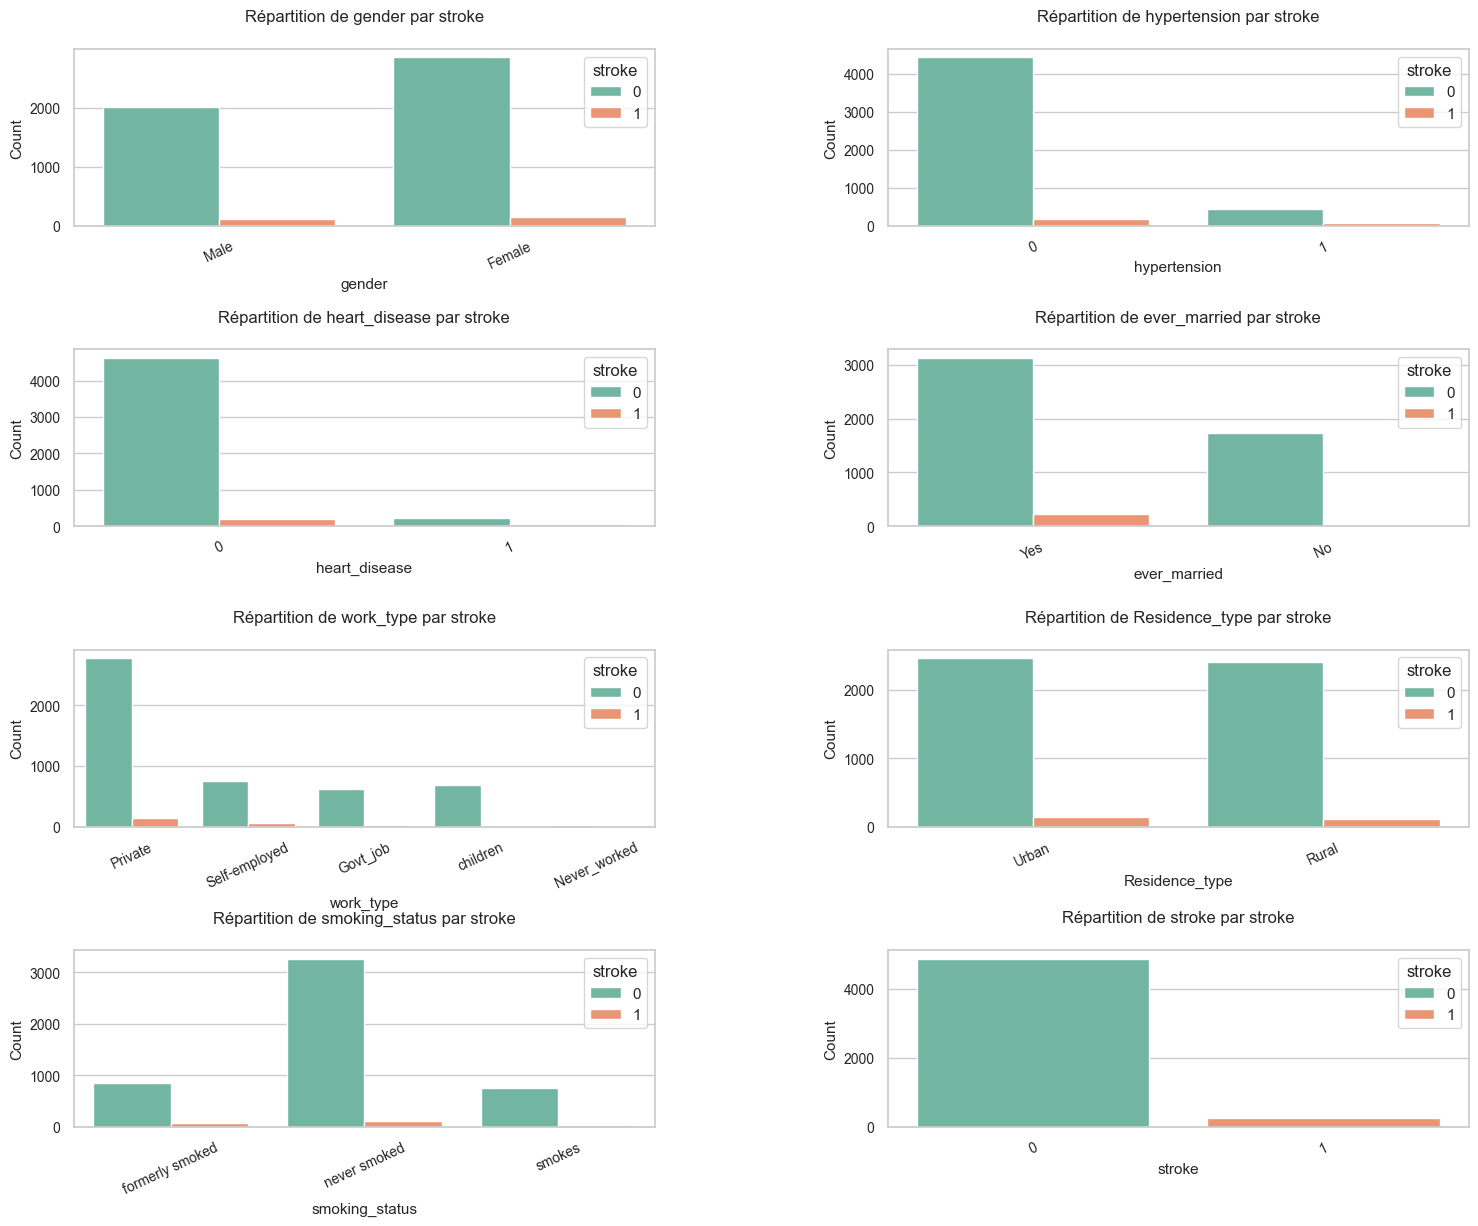

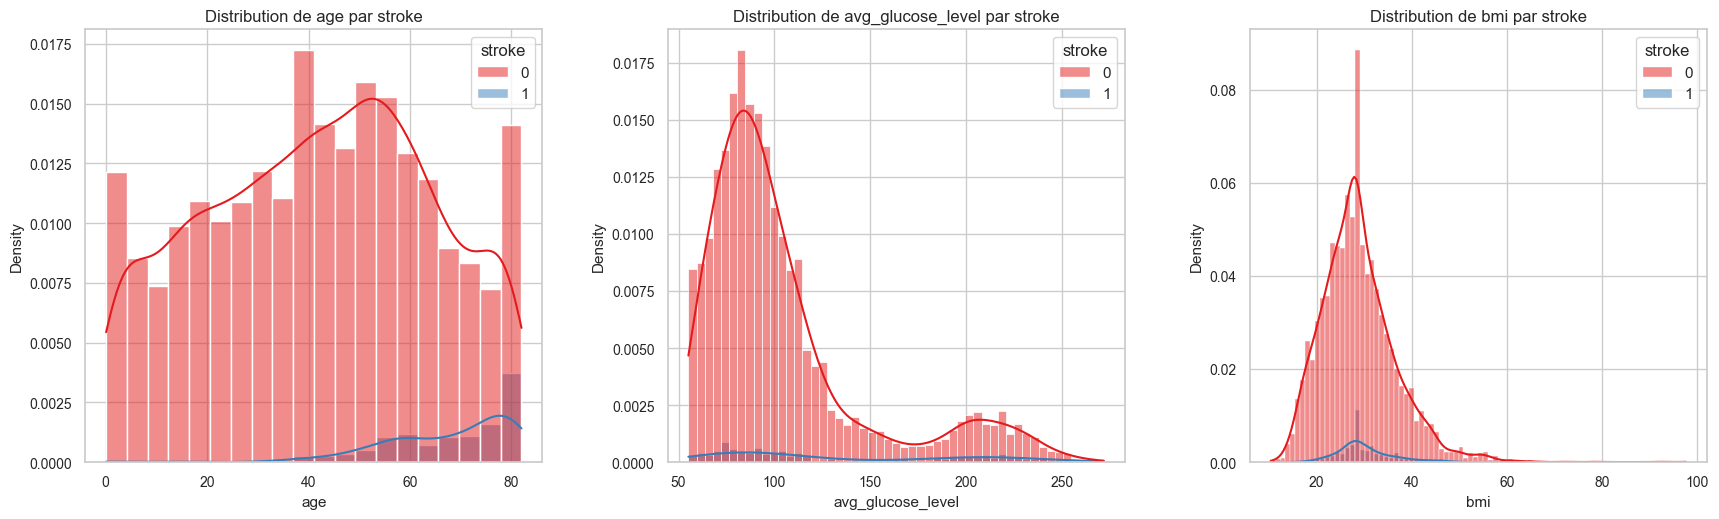

In [56]:
# Définir les colonnes
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Visualisation des variables catégoriques avec pourcentages
plt.figure(figsize=(18, 14))  # Agrandir la taille de la figure
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    # Créer le countplot
    ax = sns.countplot(x=col, hue='stroke', data=data, palette='Set2')
    
    # Calculer les comptes et les pourcentages à partir des données groupées
    grouped = data.groupby([col, 'stroke']).size().unstack(fill_value=0)
    total = grouped.sum(axis=1)  # Total par catégorie
    percentages = grouped.div(total, axis=0) * 100  # Pourcentages pour chaque catégorie et stroke
    
    # Obtenir les catégories dans l'ordre affiché sur l'axe x
    categories = [tick.get_text() for tick in ax.get_xticklabels()]
    # Convertir les catégories si nécessaire (pour les colonnes numériques)
    categories = [int(cat) if data[col].dtype in [np.int64, np.int32, np.float64] else cat for cat in categories]
    
    # Obtenir les valeurs de hue (stroke) dans l'ordre de la légende
    hue_levels = [int(label.get_text()) for label in ax.get_legend().get_texts()]
    
    # Ajouter les pourcentages sur les barres
    bar_idx = 0  # Compteur pour parcourir les barres dans ax.patches
    for j, category in enumerate(categories):
        # Pour chaque catégorie, on s'attend à 2 barres (stroke=0 et stroke=1)
        heights = []
        bars = []
        # Collecter les barres pour cette catégorie
        for k in range(len(hue_levels)):  # stroke = 0 ou 1
            if bar_idx >= len(ax.patches):  # Si on a dépassé le nombre de barres
                break
            p = ax.patches[bar_idx]
            x = p.get_x()
            category_idx = int(x // 1)
            if category_idx != j:  # Pas la bonne catégorie
                continue
            heights.append(p.get_height())
            bars.append(p)
            bar_idx += 1
        
        # Associer les pourcentages en fonction des hauteurs (taller bar gets higher percentage)
        if len(heights) == 2:  # Si on a 2 barres (stroke=0 et stroke=1)
            stroke_0_percentage = percentages.loc[category, 0] if category in percentages.index else 0
            stroke_1_percentage = percentages.loc[category, 1] if category in percentages.index else 0
            # La barre la plus haute doit avoir le pourcentage le plus élevé
            if heights[0] > heights[1]:
                # Première barre (stroke=0) est plus haute
                bars[0].set_height(heights[0])
                bars[1].set_height(heights[1])
                if stroke_0_percentage > stroke_1_percentage:
                    # Les pourcentages sont dans le bon ordre
                    ax.text(bars[0].get_x() + bars[0].get_width() / 2., heights[0] + 50,
                            f'{stroke_0_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
                    ax.text(bars[1].get_x() + bars[1].get_width() / 2., heights[1] + 50,
                            f'{stroke_1_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
                else:
                    # Inverser les pourcentages
                    ax.text(bars[0].get_x() + bars[0].get_width() / 2., heights[0] + 50,
                            f'{stroke_1_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
                    ax.text(bars[1].get_x() + bars[1].get_width() / 2., heights[1] + 50,
                            f'{stroke_0_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
            else:
                # Deuxième barre (stroke=1) est plus haute
                bars[0].set_height(heights[0])
                bars[1].set_height(heights[1])
                if stroke_1_percentage > stroke_0_percentage:
                    # Les pourcentages sont dans le bon ordre
                    ax.text(bars[0].get_x() + bars[0].get_width() / 2., heights[0] + 50,
                            f'{stroke_0_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
                    ax.text(bars[1].get_x() + bars[1].get_width() / 2., heights[1] + 50,
                            f'{stroke_1_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
                else:
                    # Inverser les pourcentages
                    ax.text(bars[0].get_x() + bars[0].get_width() / 2., heights[0] + 50,
                            f'{stroke_1_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
                    ax.text(bars[1].get_x() + bars[1].get_width() / 2., heights[1] + 50,
                            f'{stroke_0_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
        elif len(heights) == 1:  # Si on a une seule barre (par exemple, stroke=1 est absent)
            stroke_0_percentage = percentages.loc[category, 0] if category in percentages.index else 0
            stroke_1_percentage = percentages.loc[category, 1] if category in percentages.index else 0
            if heights[0] > 0:
                # On a une barre, vérifier quel pourcentage correspond
                if stroke_0_percentage > stroke_1_percentage:
                    ax.text(bars[0].get_x() + bars[0].get_width() / 2., heights[0] + 50,
                            f'{stroke_0_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
                else:
                    ax.text(bars[0].get_x() + bars[0].get_width() / 2., heights[0] + 50,
                            f'{stroke_1_percentage:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.title(f"Répartition de {col} par stroke", fontsize=12, pad=20)  # Ajouter un espacement au titre
    plt.xticks(rotation=25, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Count', fontsize=11)

plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Augmenter l'espacement entre les sous-graphiques
plt.show()

# Visualisation des variables numériques
plt.figure(figsize=(18, 6))  # Agrandir la taille de la figure
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=col, hue='stroke', kde=True, palette='Set1', stat='density')
    plt.title(f"Distribution de {col} par stroke", fontsize=12)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Density', fontsize=11)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout(pad=3.0)  # Augmenter l'espacement global entre les sous-graphiques
plt.show()

##### 1. **Répartition des Variables Catégoriques par Stroke (Histogrammes)**
- **Gender** : AVC = 0 : ~2000 hommes, ~2900 femmes ; AVC = 1 : ~100 hommes, ~140 femmes. Pas de différence nette.
- **Hypertension** : AVC = 0 : ~4400 (non), ~450 (oui) ; AVC = 1 : ~200 (non), ~50 (oui). Proportion plus élevée chez AVC = 1 (corrélation 0,13).
- **Heart Disease** : AVC = 0 : ~4650 (non), ~250 (oui) ; AVC = 1 : ~200 (non), ~50 (oui). Proportion plus élevée chez AVC = 1 (corrélation 0,13).
- **Ever Married** : AVC = 0 : ~3100 (oui), ~1600 (non) ; AVC = 1 : ~230 (oui), ~20 (non). Plus d’AVC chez les mariés (lié à l’âge ?).
- **Work Type** : AVC = 1 majoritairement dans le privé (~200), rare chez les enfants (~5) et ceux qui n’ont jamais travaillé (~0).
- **Residence Type** : AVC = 0 : ~2500 (Urbain), ~2300 (Rural) ; AVC = 1 : ~130 (Urbain), ~120 (Rural). Pas d’impact clair.
- **Smoking Status** : AVC = 1 : ~120 (Jamais fumé), ~50 (Unknown), ~50 (Anciennement fumé), ~30 (Fume). Légère surreprésentation des fumeurs/ex-fumeurs.

##### 2. **Distribution des Variables Numériques par Stroke (Histogrammes avec Densité)**
- **Âge** : AVC = 1 : Pic à ~80 ans ; AVC = 0 : Bimodal (0-20, 40-60). Confirme corrélation 0,25.
- **Avg Glucose Level** : AVC = 1 : Plus de cas >150 mg/dL ; AVC = 0 : Pic à ~90. Corrélée à 0,13.
- **BMI** : Distributions similaires (pic ~28). Faible impact (corrélation 0,04).

**Conclusion** : L’âge, l’hypertension, et les maladies cardiaques sont des facteurs clés pour les AVC, suivis par le tabagisme. Le déséquilibre de stroke (4,9 % positifs) reste un défi pour la modélisation.

### 4.2 Analyse des Échantillons avec Stroke

#### 4.2.1 Création d'un Sous-Ensemble de Données pour les Individus avec Stroke

In [57]:
Stroke_Data = data[data["stroke"] == 1]

#### 4.2.2 Box Plot de BMI, Niveau Moyen de Glucose et Âge selon le Genre

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Définir une palette de couleurs adaptée
colors = {
    'Male': '#FF6666',    # Rouge clair
    'Female': '#66B2FF',  # Bleu clair
    'Other': '#66CC66'    # Vert clair
}

# Vérifier les valeurs uniques dans gender pour confirmer qu'elles sont textuelles
print("Valeurs uniques dans gender avant filtrage :", data['gender'].unique())

# Supprimer les lignes avec des valeurs manquantes dans bmi, avg_glucose_level, ou age
data_clean = data.dropna(subset=['bmi', 'avg_glucose_level', 'age'])

# Vérifier les valeurs manquantes après nettoyage
print("Nombre de lignes après suppression des NaN :", len(data_clean))

# Créer une figure avec 3 sous-graphiques alignés dans une seule ligne (1 ligne, 3 colonnes)
fig = make_subplots(rows=1, cols=3, 
                    subplot_titles=("Box Plot de BMI selon le Genre", 
                                    "Box Plot du Niveau Moyen de Glucose selon le Genre", 
                                    "Box Plot de l'Âge selon le Genre"),
                    shared_yaxes=False)

# Définir les catégories à afficher dans la légende
legend_categories = ['Male', 'Female']

# Box Plot pour BMI selon Gender (Sous-graphique 1) - Afficher la légende uniquement pour Male et Female
for gender in data_clean['gender'].unique():
    if pd.isna(gender):  # Ignorer les valeurs NaN
        continue
    fig.add_trace(
        go.Box(
            y=data_clean[data_clean['gender'] == gender]['bmi'],
            name=gender,
            marker_color=colors.get(gender, '#888888'),  # Utiliser la couleur définie ou gris par défaut
            boxpoints=False,  # Ne pas montrer les points individuels
            legendgroup="gender",  # Grouper toutes les traces sous un même groupe
            showlegend=(gender in legend_categories)  # Afficher la légende uniquement pour Male et Female
        ),
        row=1, col=1
    )

# Box Plot pour Avg Glucose Level selon Gender (Sous-graphique 2) - Masquer la légende
for gender in data_clean['gender'].unique():
    if pd.isna(gender):
        continue
    fig.add_trace(
        go.Box(
            y=data_clean[data_clean['gender'] == gender]['avg_glucose_level'],
            name=gender,
            marker_color=colors.get(gender, '#888888'),
            boxpoints=False,
            legendgroup="gender",  # Même groupe que les autres
            showlegend=False  # Masquer la légende pour ce sous-graphique
        ),
        row=1, col=2
    )

# Box Plot pour Age selon Gender (Sous-graphique 3) - Masquer la légende
for gender in data_clean['gender'].unique():
    if pd.isna(gender):
        continue
    fig.add_trace(
        go.Box(
            y=data_clean[data_clean['gender'] == gender]['age'],
            name=gender,
            marker_color=colors.get(gender, '#888888'),
            boxpoints=False,
            legendgroup="gender",  # Même groupe que les autres
            showlegend=False  # Masquer la légende pour ce sous-graphique
        ),
        row=1, col=3
    )

# Mettre à jour la mise en page
fig.update_layout(
    title_text="Box Plots Alignés de BMI, Niveau Moyen de Glucose et Âge selon le Genre pour les Patients avec AVC",
    title_x=0.5,
    title_font_size=15,
    width=1200,  # Largeur totale pour les trois graphiques
    height=600,
    template='plotly_white',  # Thème blanc, similaire à "whitegrid" de Seaborn
    # Positionner une seule légende
    legend=dict(
        title="Genre",
        x=1.05,  # Positionner à droite du graphique
        y=0.5,
        tracegroupgap=10  # Espacement réduit, car un seul groupe
    ),
    # Ajouter des marges pour simuler des cadres blancs
    margin=dict(l=40, r=40, t=80, b=40),
    # Ajouter des bordures blanches autour de chaque sous-graphique
    shapes=[
        # Bordure pour le sous-graphique 1 (BMI)
        dict(
            type='rect',
            xref='paper', yref='paper',
            x0=0.0, x1=0.32, y0=0.0, y1=1.0,
            line=dict(color='lightgray', width=2)
        ),
        # Bordure pour le sous-graphique 2 (Glucose)
        dict(
            type='rect',
            xref='paper', yref='paper',
            x0=0.37, x1=0.65, y0=0.0, y1=1.0,
            line=dict(color='lightgray', width=2)
        ),
        # Bordure pour le sous-graphique 3 (Âge)
        dict(
            type='rect',
            xref='paper', yref='paper',
            x0=0.72, x1=1.0, y0=0.0, y1=1.0,
            line=dict(color='lightgray', width=2)
        )
    ]
)

# Mettre à jour les axes
fig.update_xaxes(title_text="Genre", row=1, col=1, tickangle=45)
fig.update_xaxes(title_text="Genre", row=1, col=2, tickangle=45)
fig.update_xaxes(title_text="Genre", row=1, col=3, tickangle=45)

fig.update_yaxes(title_text="BMI", row=1, col=1)
fig.update_yaxes(title_text="Niveau Moyen de Glucose", row=1, col=2)
fig.update_yaxes(title_text="Âge", row=1, col=3)

# Afficher le graphique
fig.show()

Valeurs uniques dans gender avant filtrage : ['Male' 'Female']
Nombre de lignes après suppression des NaN : 5110


### Interprétation des Box Plots (Patients avec AVC)

#### 1. **IMC selon le Genre**
- **Homme** : Médiane ~30, plage 15-92, plusieurs outliers >60.
- **Femme** : Médiane ~28, plage 15-80, moins d’outliers.
- **Insight** : Pas de différence significative entre genres (corrélation faible avec AVC : 0,04).

#### 2. **Niveau Moyen de Glucose selon le Genre**
- **Homme** : Médiane ~110 mg/dL, plage 55-271, outliers >200.
- **Femme** : Médiane ~105 mg/dL, plage 55-250, outliers similaires.
- **Insight** : Niveaux légèrement plus élevés chez les hommes, mais différence minime (corrélation 0,13).

#### 3. **Âge selon le Genre**
- **Homme** : Médiane ~70 ans, plage 40-82.
- **Femme** : Médiane ~68 ans, plage 40-82.
- **Insight** : Âge similaire, les AVC touchent majoritairement les personnes âgées (corrélation 0,25).

**Conclusion** : Pour les patients avec AVC, il n’y a pas de différence notable entre hommes et femmes pour l’IMC, le glucose, ou l’âge. L’âge élevé reste un facteur clé, tandis que l’IMC et le glucose montrent des variations mais un impact limité.

#### 4.2.3 Comptage des Statuts "Ever Married", Type de Résidence et Type de Travail

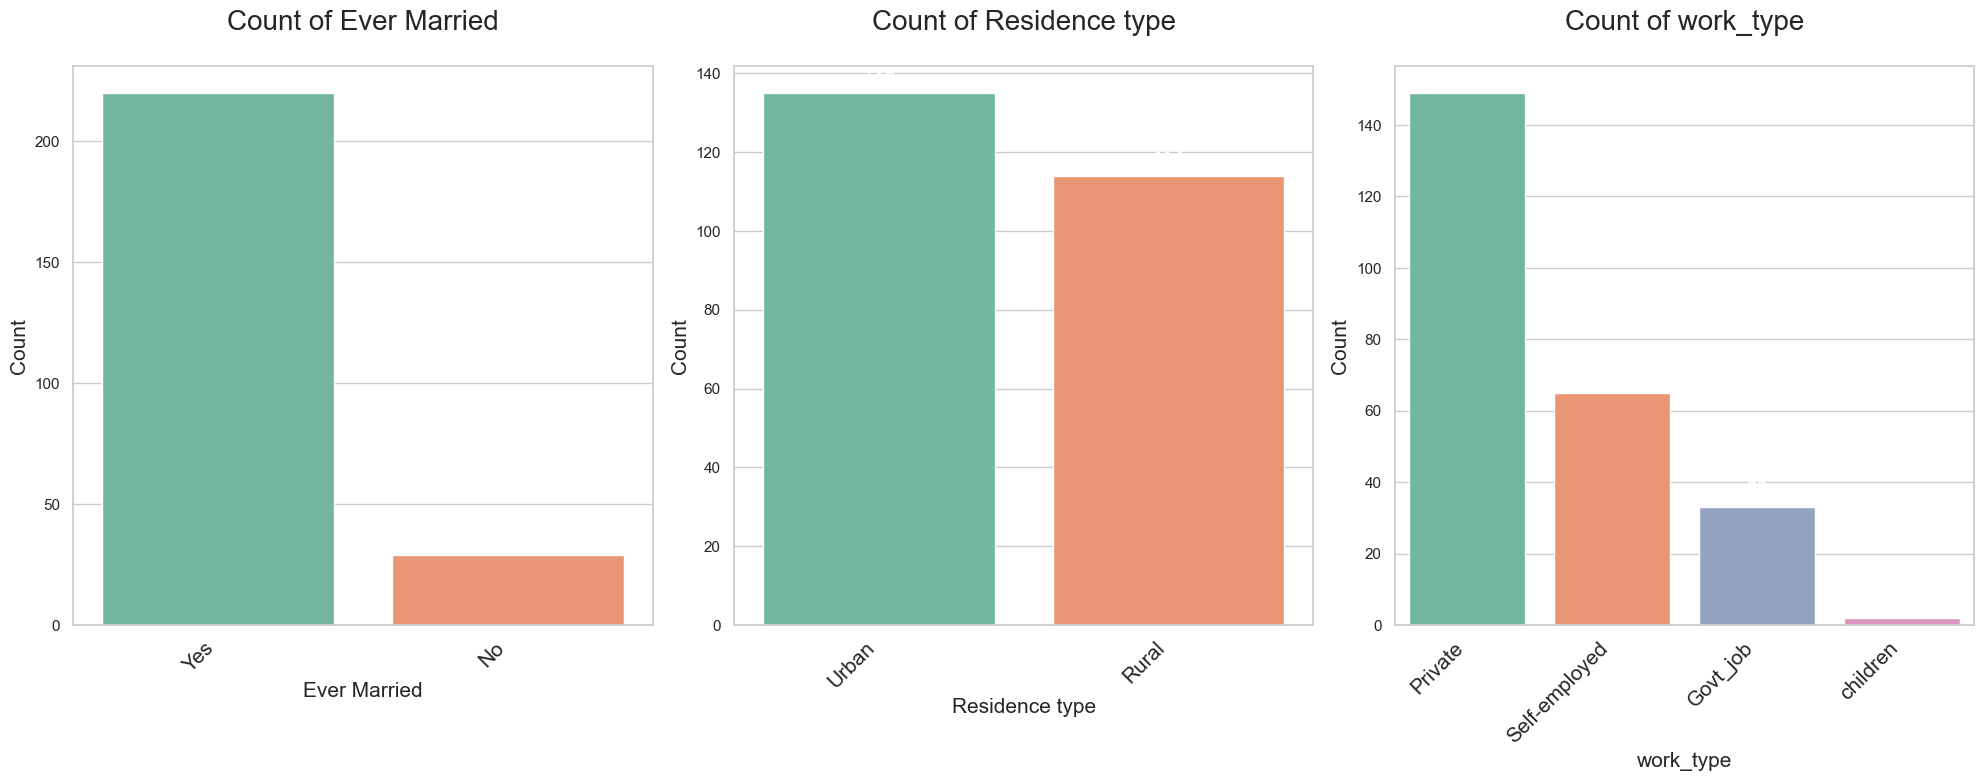

In [59]:
sns.set(style = "whitegrid")

plt.figure(figsize = (20, 8))

# Count Plot for Ever Married
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data = Stroke_Data, x = "ever_married", hue = "ever_married", palette = "Set2")
plt.title("Count of Ever Married", fontsize = 20, y = 1.05)
plt.xlabel("Ever Married", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation = 45, ha = "right", fontsize = 15) 

# Annotate counts on the bars for Ever Married
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 15, color ="white", 
                  xytext = (0, 5), 
                  textcoords = "offset points")


# Count Plot for Ever Residence type
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data = Stroke_Data, x = "Residence_type", hue = "Residence_type", palette = "Set2")
plt.title("Count of Residence type", fontsize = 20, y = 1.05)
plt.xlabel("Residence type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation = 45, ha = "right", fontsize = 15) 

# Annotate counts on the bars for Residence type
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 15, color = "white", 
                  xytext = (0, 5), 
                  textcoords = "offset points")
    
# Count Plot for Ever work_type
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data = Stroke_Data, x = "work_type", hue = "work_type", palette = "Set2")
plt.title("Count of work_type", fontsize = 20, y = 1.05)
plt.xlabel("work_type", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation = 45, ha = "right", fontsize = 15) 

# Annotate counts on the bars for Smoking Status
for p in ax3.patches:
    ax3.annotate(f"{int(p.get_height())}", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = "center", va = "bottom", 
                  fontsize = 15, color = "white", 
                  xytext = (0, 5), 
                  textcoords = "offset points")


plt.tight_layout()
plt.show()

### Interprétation des Histogrammes

#### 1. **Count of Ever Married**
- **Yes** : ~200 patients.
- **No** : ~50 patients.
- **Insight** : Majorité des patients avec AVC sont mariés, probablement lié à l’âge plus élevé (corrélation âge-AVC : 0,25).

#### 2. **Count of Residence Type**
- **Urban** : ~130 patients.
- **Rural** : ~120 patients.
- **Insight** : Répartition presque équilibrée, pas d’impact clair sur les AVC.

#### 3. **Count of Work Type**
- **Private** : ~150 patients.
- **Self-employed** : ~50 patients.
- **Govt Job** : ~30 patients.
- **Children** : ~10 patients.
- **Never Worked** : ~0 patients.
- **Insight** : Les AVC sont plus fréquents dans le secteur privé, rares chez les enfants et ceux qui n’ont jamais travaillé, possiblement lié à l’âge ou au stress professionnel.

**Conclusion** : Les patients avec AVC sont majoritairement mariés, travaillent dans le privé, et sont répartis équitablement entre zones urbaines et rurales. L’âge et le type de travail pourraient influencer indirectement le risque d’AVC.

#### 4.2.4 Heatmap de Corrélation avec Focus sur Hypertension et Heart Disease

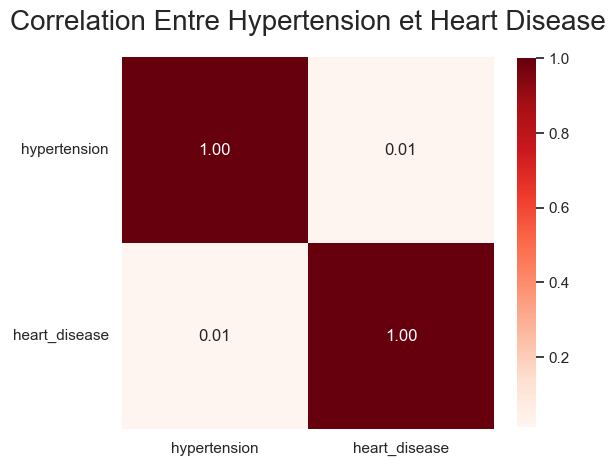

In [60]:
sns.set(style = "whitegrid")

# Calculate the correlation matrix
correlation_matrix = Stroke_Data[["hypertension", "heart_disease"]].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize = (6, 6))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "Reds", square = True, cbar_kws = {"shrink": .8})
plt.title("Correlation Entre Hypertension et Heart Disease", fontsize = 20, y = 1.05)
plt.yticks(rotation = 0, ha = "right") 

plt.show()

Corrélation faible entre hypertension et heart_disease : 0,01.

#### 4.2.5 Bar Plot du Statut de Fumeur et du Niveau Moyen de Glucose selon le Genre

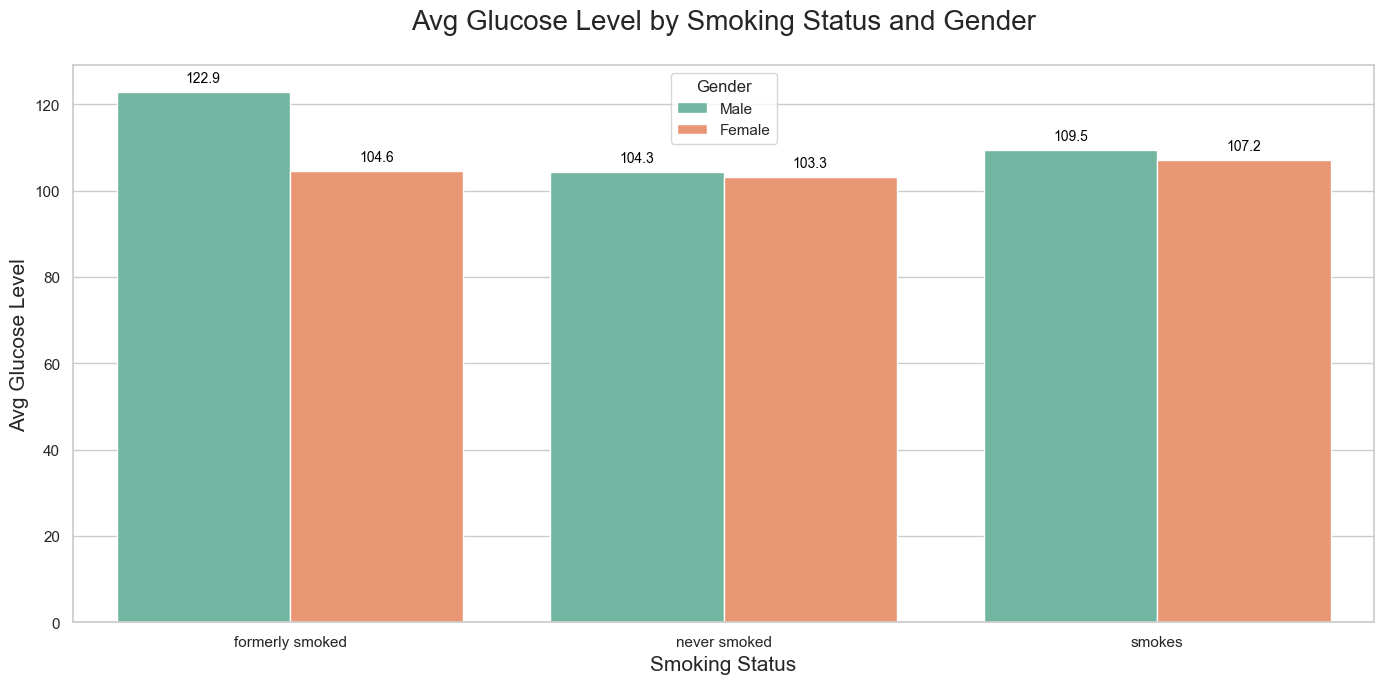

In [61]:
# Set the seaborn style
sns.set(style="whitegrid")

# Filter out 'Unknown' smoking status and ensure no invalid data
data_plot = data[data['smoking_status'] != 'Unknown'].copy()

# Create a grouped bar chart for Avg Glucose Level by Smoking Status and Gender
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=data_plot, x="smoking_status", y="avg_glucose_level", hue="gender", errorbar=None, palette="Set2")

# Annotate the bars with the average glucose level, ensuring no zero or invalid annotations
for p in ax.patches:
    height = p.get_height()
    # Only annotate if the height is valid and non-zero to avoid the "0.0" issue
    if height > 0 and not pd.isna(height):
        ax.annotate(f"{height:.1f}", 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha="center", va="bottom", 
                    fontsize=10, color="black", 
                    xytext=(0, 5), 
                    textcoords="offset points")

plt.title("Avg Glucose Level by Smoking Status and Gender", fontsize=20, y=1.05)
plt.xlabel("Smoking Status", fontsize=15)
plt.ylabel("Avg Glucose Level", fontsize=15)
plt.legend(title="Gender")

plt.tight_layout()
plt.show()

### Interprétation du Graphique

#### **Niveau Moyen de Glucose par Statut de Fumeur et Genre**
- **Formerly Smoked** : 
  - Homme : 122,9 mg/dL.
  - Femme : 104,6 mg/dL.
- **Never Smoked** : 
  - Homme : 104,3 mg/dL.
  - Femme : 103,3 mg/dL.
- **Smokes** : 
  - Homme : 109,5 mg/dL.
  - Femme : 107,2 mg/dL.

**Insight** : Les hommes ont des niveaux de glucose systématiquement plus élevés que les femmes dans tous les statuts de fumeur. Les ex-fumeurs hommes ont le niveau le plus élevé (122,9 mg/dL), tandis que les femmes non-fumeuses ont le plus bas (103,3 mg/dL). Le tabagisme semble associé à des niveaux de glucose plus élevés, surtout chez les hommes, mais la corrélation avec AVC reste faible (0,13).

## 5. Pré-traitement de données

### 5.1 Encodage des Variables Catégoriques

In [62]:
# Liste des colonnes catégoriques à encoder
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

# Initialiser un dictionnaire pour stocker les encodeurs
label_encoders = {}

print("=== Encodage des Variables Catégoriques ===")

# Encoder directement chaque colonne catégorique dans data
for col in categorical_cols:
    if col in data.columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col].astype(str))
        print(f"Colonne '{col}' encodée avec succès.")
    else:
        print(f"Colonne '{col}' non trouvée dans data. Ignorée.")

# Vérifier les types de données après encodage
print("\nTypes de données après encodage :")
print(data.dtypes)

# Afficher un aperçu des données encodées
print("\nAperçu des données après encodage :")
print(data.head())

=== Encodage des Variables Catégoriques ===
Colonne 'gender' encodée avec succès.
Colonne 'hypertension' encodée avec succès.
Colonne 'heart_disease' encodée avec succès.
Colonne 'ever_married' encodée avec succès.
Colonne 'work_type' encodée avec succès.
Colonne 'Residence_type' encodée avec succès.
Colonne 'smoking_status' encodée avec succès.

Types de données après encodage :
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

Aperçu des données après encodage :
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             

### 5.2 Suppression des variables redondantes

In [63]:
print("=== Suppression des variables redondantes ===")
cols_to_drop = [col for col in data.columns if 'groupe_age' in col or 'groupe_glucose' in col or 'groupe_imc' in col]
data = data.drop(columns=cols_to_drop)
print("Colonnes après suppression des variables redondantes :")
print(data.columns)

=== Suppression des variables redondantes ===
Colonnes après suppression des variables redondantes :
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


### 5.3  Vérification et traitement des valeurs aberrantes

Statistiques avant winsorisation :
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.862035
std      22.612647          45.283560     7.699562
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000


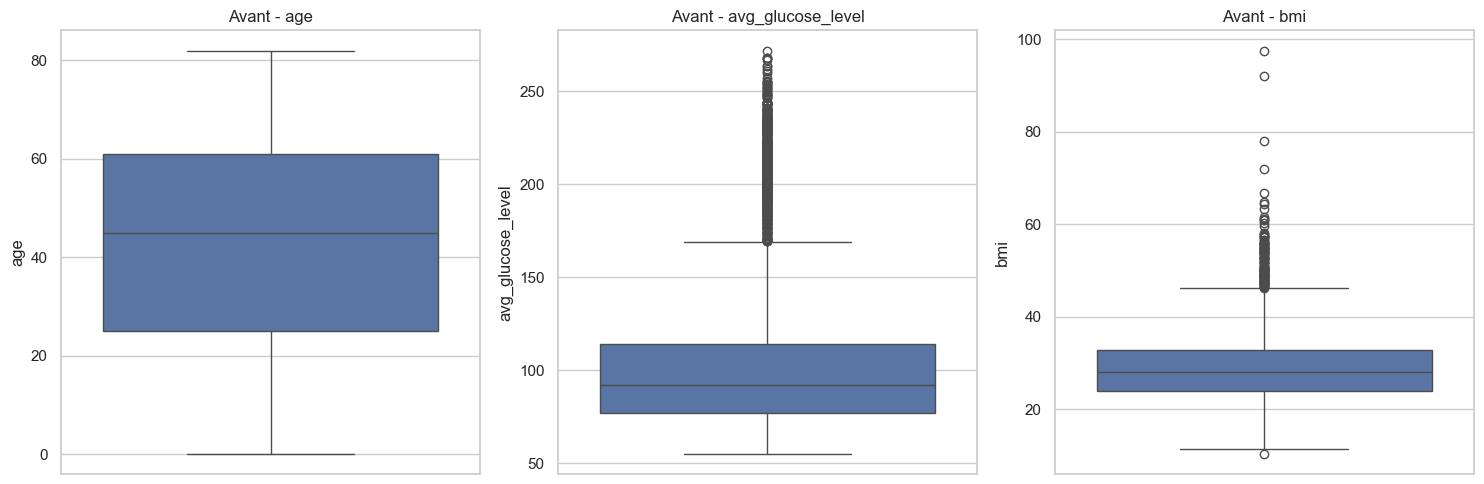

Résumé des valeurs aberrantes (Méthode IQR) :
             Colonne  Nombre d'outliers  \
0                age                  0   
1  avg_glucose_level                627   
2                bmi                126   

                        Exemples d'outliers  
0                                        []  
1  [228.69, 202.21, 171.23, 174.12, 186.21]  
2            [48.9, 47.5, 56.6, 50.1, 54.6]  
=== Traitement des valeurs aberrantes avec la winsorisation ===
Statistiques après winsorisation :
               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.230020         105.933339    28.756928
std      22.567349          44.545605     7.174405
min       1.720000          57.430000    16.200000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    32.800000
max      81.000000         231.950000    48.100000


In [64]:
# === Vérification des valeurs aberrantes ===
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
print("Statistiques avant winsorisation :")
print(data[numerical_cols].describe())

# Boxplots avant winsorisation
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data[col])
    plt.title(f"Avant - {col}")
plt.tight_layout()
plt.show()

# Méthode IQR pour détecter les outliers
outliers_summary = []
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outliers_summary.append({
        'Colonne': col,
        'Nombre d\'outliers': len(outliers),
        'Exemples d\'outliers': outliers.head().values
    })

# Afficher le résumé des outliers
print("Résumé des valeurs aberrantes (Méthode IQR) :")
print(pd.DataFrame(outliers_summary))

# === Traitement des valeurs aberrantes avec la winsorisation ===
print("=== Traitement des valeurs aberrantes avec la winsorisation ===")
for col in numerical_cols:
    winsorized = mstats.winsorize(data[col], limits=[0.02, 0.02])
    
    data[col] = pd.Series(np.asarray(winsorized), index=data.index)

# Vérifier les statistiques après winsorisation
print("Statistiques après winsorisation :")
print(data[numerical_cols].describe())




### 5.4 Sélection des caractéristiques les plus pertinentes

Importance des caractéristiques (triées par ordre décroissant) :
             Feature  Importance
1                age    0.046536
7  avg_glucose_level    0.043249
8                bmi    0.042133
9     smoking_status    0.024755
5          work_type    0.022544
0             gender    0.019687
6     Residence_type    0.018650
4       ever_married    0.017573
2       hypertension    0.013112
3      heart_disease    0.010098
Graphique de l'importance des caractéristiques sauvegardé sous 'feature_importance.png'

Caractéristiques sélectionnées (importance > 0.02) :
['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'work_type']

Nouveau DataFrame data avec les caractéristiques sélectionnées : (5110, 6)
Colonnes restantes :
Index(['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'work_type',
       'stroke'],
      dtype='object')


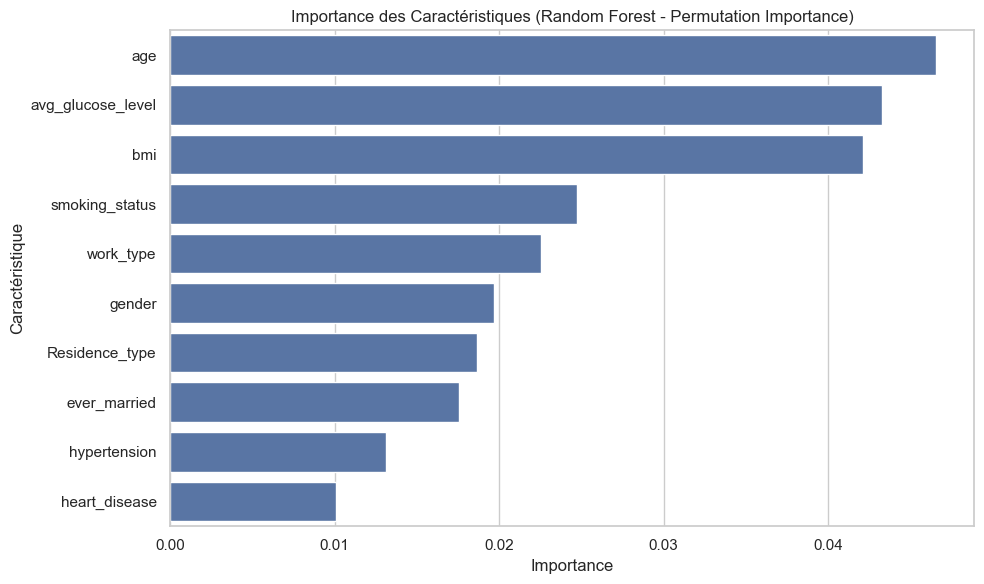

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Assuming 'data' is the full DataFrame
# Séparer les features (X) et la cible (y)
X = data.drop(columns=['stroke'])
y = data['stroke']

# Entraîner un modèle Random Forest pour évaluer l'importance des caractéristiques
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # Added class_weight
rf.fit(X, y)

# Obtenir l'importance des caractéristiques avec permutation importance
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Afficher l'importance des caractéristiques
print("Importance des caractéristiques (triées par ordre décroissant) :")
print(feature_importances)

# Visualiser l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Importance des Caractéristiques (Random Forest - Permutation Importance)")
plt.xlabel("Importance")
plt.ylabel("Caractéristique")
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Graphique de l'importance des caractéristiques sauvegardé sous 'feature_importance.png'")

# Sélectionner les caractéristiques les plus pertinentes
threshold = 0.02  # Keep the original threshold
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature'].tolist()
print(f"\nCaractéristiques sélectionnées (importance > {threshold}) :")
print(selected_features)

# Mettre à jour le DataFrame data avec les caractéristiques sélectionnées
data = data[selected_features + ['stroke']]
print(f"\nNouveau DataFrame data avec les caractéristiques sélectionnées : {data.shape}")
print("Colonnes restantes :")
print(data.columns)

### Importance des Caractéristiques pour la Prédiction d'AVC avec Random Forest (Permutation Importance)

#### Analyse de l'Importance des Caractéristiques :
Le graphique montre l'importance des caractéristiques pour prédire un AVC (stroke) à l'aide de Random Forest, mesurée par la méthode de permutation importance. Les variables sont triées par ordre décroissant d'importance :

- **Âge** : 0.0465 – Facteur le plus déterminant, confirmant que l’âge avancé est un prédicteur clé d’AVC.
- **Niveau de glucose moyen** : 0.0432 – Deuxième en importance, indiquant un lien fort entre des niveaux élevés de glucose (diabète) et le risque d’AVC.
- **IMC (bmi)** : 0.0421 – Troisième, suggérant que le surpoids est un facteur significatif.
- **Statut tabagique** : 0.0248 – Modérément important, les habitudes de tabagisme influencent le risque.
- **Type de travail** : 0.0225 – A un impact notable, probablement lié au stress ou au mode de vie.
- **Genre**, **Résidence**, **Mariage**, **Hypertension**, **Maladie cardiaque** : Importance plus faible (entre 0.01 et 0.02), indiquant un rôle moindre dans la prédiction.

#### Caractéristiques Sélectionnées (Importance > 0.02) :
Seules les variables avec une importance supérieure à 0.02 ont été retenues : age, avg_glucose_level, bmi, smoking_status, work_type.

### Synthèse :
L’âge, le niveau de glucose et l’IMC sont les principaux prédicteurs d’AVC, suivis par le tabagisme et le type de travail. Les autres variables (hypertension, maladie cardiaque, etc.) ont un impact moindre dans ce modèle, bien qu’elles restent des facteurs de risque connus.

### 5.5 Séparation des Variables X et y, Division des Données 

In [66]:
X = data.drop(columns=['stroke'])
y = data['stroke']

# 1. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures the class distribution is preserved in the split
)


### 5.6 Normalisation des Données avec QuantileTransformer(Distribution Normale)

In [67]:
scaler = QuantileTransformer(output_distribution='normal', random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5.7 Rééquilibrage avec ADASYN (suréchantillonner la classe minoritaire (stroke=1))

In [68]:
import warnings
from imblearn.over_sampling import ADASYN

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
# Apply ADASYN
    adasyn = ADASYN(sampling_strategy=0.9, random_state=42)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Check distribution after ADASYN
print("Distribution of 'stroke' after ADASYN (training set):")
print(pd.Series(y_train_adasyn).value_counts(normalize=True))

Distribution of 'stroke' after ADASYN (training set):
stroke
0    0.52854
1    0.47146
Name: proportion, dtype: float64


# 6. Machine Learning

## 6.1 🔍 K-Nearest Neighbors (KNN)

### Définition :
Prédit une classe ou une valeur selon les K exemples les plus proches dans l’espace des caractéristiques.

### Étapes :
1. Choisir les K voisins les plus proches d’un point.
2. Classer selon la majorité (ou moyenne pour régression).

### Avantages :
- Simple à comprendre.
- Pas d’entraînement réel.

### Inconvénients :
- Lent à prédire sur grands datasets.
- Sensible au bruit et au choix de K.

### Hyperparamètres importants :
- `n_neighbors` (K)
- `metric` (distance : euclidean, manhattan, etc.)
- `weights` (uniform ou distance)

In [69]:
# KNeighbors Classifier (KNN)
print("=== KNeighbors Classifier (KNN) ===")
KNN = KNeighborsClassifier()

# Définir les hyperparamètres à optimiser
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Optimisation avec GridSearchCV
grid_KNN = GridSearchCV(KNN, param_grid_KNN, cv=4, scoring='recall', n_jobs=-1)
grid_KNN.fit(X_train_adasyn, y_train_adasyn )

# Meilleurs paramètres
print("Meilleurs paramètres pour KNN :", grid_KNN.best_params_)

# Prédire avec le meilleur modèle
best_KNN = grid_KNN.best_estimator_
y_pred_KNN = best_KNN.predict(X_test)
acc_KNN = accuracy_score(y_test, y_pred_KNN)

# Rapport de classification
print(classification_report(y_test, y_pred_KNN, zero_division=0))
print("Accuracy Score pour KNN : {:.2f}%".format(acc_KNN * 100))

=== KNeighbors Classifier (KNN) ===


Meilleurs paramètres pour KNN : {'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       972
           1       0.08      0.30      0.13        50

    accuracy                           0.80      1022
   macro avg       0.52      0.56      0.51      1022
weighted avg       0.92      0.80      0.85      1022

Accuracy Score pour KNN : 80.04%


## 6.2 🚀 Gradient Boosting (GBM)

### Définition :
Algorithme d’ensemble qui construit des arbres faibles successivement pour corriger les erreurs des précédents.

### Étapes :
1. Démarrer avec une prédiction simple.
2. Calculer les résidus.
3. Apprendre un arbre sur les résidus.
4. Répéter et combiner les arbres.

### Avantages :
- Très performant.
- Gère bien les relations complexes.

### Inconvénients :
- Plus lent à entraîner.
- Sensible au surapprentissage sans réglage.

### Hyperparamètres importants :
- `n_estimators`
- `learning_rate`
- `max_depth`
- `subsample`
- `min_samples_split`

In [70]:
# Gradient Boosting Classifier (GBM)
print("=== Gradient Boosting Classifier (GBM) ===")
GBM = GradientBoostingClassifier(random_state=42)

# Définir les hyperparamètres à optimiser
param_grid_GBM = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
    
}

# Optimisation avec GridSearchCV
grid_GBM = GridSearchCV(GBM, param_grid_GBM, cv=4, scoring='recall', n_jobs=-1)
grid_GBM.fit(X_train_adasyn, y_train_adasyn )

# Meilleurs paramètres
print("Meilleurs paramètres pour GBM :", grid_GBM.best_params_)

# Prédire avec le meilleur modèle
best_GBM = grid_GBM.best_estimator_
y_pred_GBM = best_GBM.predict(X_test)
acc_GBM = accuracy_score(y_test, y_pred_GBM)

# Rapport de classification
print(classification_report(y_test, y_pred_GBM, zero_division=0))
print("Accuracy Score pour GBM : {:.2f}%".format(acc_GBM * 100))

=== Gradient Boosting Classifier (GBM) ===


Meilleurs paramètres pour GBM : {'learning_rate': 0.01, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      0.71      0.83       972
           1       0.13      0.84      0.23        50

    accuracy                           0.72      1022
   macro avg       0.56      0.78      0.53      1022
weighted avg       0.95      0.72      0.80      1022

Accuracy Score pour GBM : 71.92%


## 6.3 🌲 Forêt Aléatoire (Random Forest - RF)

### Définition :
Ensemble d’arbres de décision entraînés sur des sous-échantillons aléatoires pour réduire l’overfitting.

### Étapes :
1. Générer plusieurs sous-échantillons du dataset.
2. Construire un arbre pour chaque sous-échantillon.
3. Agréger les prédictions (vote ou moyenne).

### Avantages :
- Moins d’overfitting qu’un arbre seul.
- Performant, robuste.
- Gère bien les données bruitées.

### Inconvénients :
- Moins interprétable.
- Plus lent qu’un DT seul.

### Hyperparamètres importants :
- `n_estimators` (nombre d’arbres)
- `max_depth`
- `max_features`
- `min_samples_leaf`

In [71]:
# Random Forest Classifier
print("=== Random Forest Classifier ===")
RF = RandomForestClassifier(random_state=42)

# Définir les hyperparamètres à optimiser
param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}

# Optimisation avec GridSearchCV
grid_RF = GridSearchCV(RF, param_grid_RF, cv=4, scoring='recall', n_jobs=-1)
grid_RF.fit(X_train_adasyn, y_train_adasyn )

# Meilleurs paramètres
print("Meilleurs paramètres pour RF :", grid_RF.best_params_)

# Prédire avec le meilleur modèle
best_RF = grid_RF.best_estimator_
y_pred_RF = best_RF.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred_RF)

# Rapport de classification
print(classification_report(y_test, y_pred_RF, zero_division=0))
print("Accuracy Score pour RF : {:.2f}%".format(acc_RF * 100))

=== Random Forest Classifier ===


Meilleurs paramètres pour RF : {'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       972
           1       0.15      0.62      0.25        50

    accuracy                           0.81      1022
   macro avg       0.56      0.72      0.57      1022
weighted avg       0.94      0.81      0.86      1022

Accuracy Score pour RF : 81.31%


## 6.4🌳 Arbre de Décision (Decision Tree - DT)

### Définition :
Arbre de décision qui segmente les données en branches selon les caractéristiques pour prédire une classe ou une valeur.

### Étapes :
1. Choisir la meilleure caractéristique pour diviser selon un critère (Gini, Entropy…).
2. Créer des branches récursivement.
3. S’arrêter à une profondeur maximale ou si la pureté est atteinte.

### Avantages :
- Interprétable.
- Peu de préparation des données.
- Rapide à entraîner.

### Inconvénients :
- Surapprentissage (overfitting).
- Sensible aux petites variations.

### Hyperparamètres importants :
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- `criterion` (gini ou entropy)

In [72]:
# Arbre de Décision
print("=== Arbre de Décision ===")
DT = DecisionTreeClassifier(random_state=42)

# Définir les hyperparamètres à optimiser
param_grid_DT = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Optimisation avec GridSearchCV
grid_DT = GridSearchCV(DT, param_grid_DT, cv=4, scoring='recall', n_jobs=-1)
grid_DT.fit(X_train_adasyn, y_train_adasyn )

# Meilleurs paramètres
print("Meilleurs paramètres pour DT :", grid_DT.best_params_)

# Prédire avec le meilleur modèle
best_DT = grid_DT.best_estimator_
y_pred_DT = best_DT.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_DT)

# Rapport de classification
print(classification_report(y_test, y_pred_DT, zero_division=0))
print("Accuracy Score pour DT : {:.2f}%".format(acc_DT * 100))

=== Arbre de Décision ===


Meilleurs paramètres pour DT : {'max_depth': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       972
           1       0.16      0.78      0.26        50

    accuracy                           0.78      1022
   macro avg       0.57      0.78      0.57      1022
weighted avg       0.95      0.78      0.84      1022

Accuracy Score pour DT : 78.28%


### 6.5 Visualisation des Matrices de Confusion pour les Modèles KNN, GBM, Random Forest et Arbre de Décision

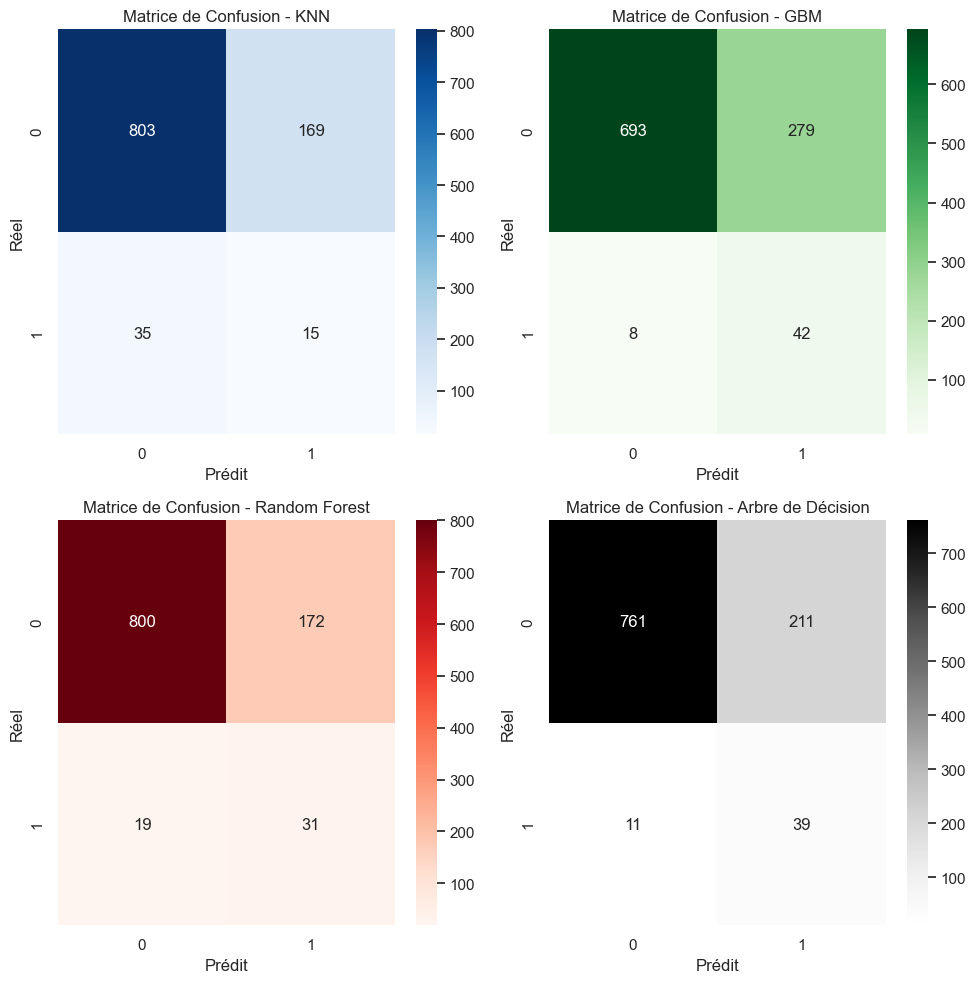

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


# Créer une grille 2x2 pour les matrices de confusion
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Matrice de Confusion pour KNN (haut à gauche)
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Matrice de Confusion - KNN")
axes[0, 0].set_xlabel("Prédit")
axes[0, 0].set_ylabel("Réel")

# Matrice de Confusion pour GBM (haut à droite)
sns.heatmap(confusion_matrix(y_test, y_pred_GBM), annot=True, fmt="d", cmap="Greens", ax=axes[0, 1])
axes[0, 1].set_title("Matrice de Confusion - GBM")
axes[0, 1].set_xlabel("Prédit")
axes[0, 1].set_ylabel("Réel")

# Matrice de Confusion pour Random Forest (bas à gauche)
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt="d", cmap="Reds", ax=axes[1, 0])
axes[1, 0].set_title("Matrice de Confusion - Random Forest")
axes[1, 0].set_xlabel("Prédit")
axes[1, 0].set_ylabel("Réel")

# Matrice de Confusion pour Arbre de Décision (bas à droite)
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, fmt="d", cmap="Greys", ax=axes[1, 1])
axes[1, 1].set_title("Matrice de Confusion - Arbre de Décision")
axes[1, 1].set_xlabel("Prédit")
axes[1, 1].set_ylabel("Réel")

# Ajuster la mise en page
plt.tight_layout()
plt.show()

### 6.6 Évaluation et Visualisation des Performances des Modèles KNN, GBM, Random Forest et Arbre de Décision

In [74]:
# === Calcul des Métriques pour Chaque Modèle ===
models = {
    'KNN': y_pred_KNN,
    'GBM': y_pred_GBM,
    'Random Forest': y_pred_RF,
    'Decision Tree': y_pred_DT
}

performance_data = []
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)  # pos_label=1 pour AVC = 1
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    auc = roc_auc_score(y_test, y_pred) if len(np.unique(y_pred)) > 1 else np.nan  # Vérifie si prédictions non constantes

    performance_data.append({
        'Modèle': model_name,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-Score': round(f1, 3),
        'AUC-ROC': round(auc, 3) if not np.isnan(auc) else 'N/A'
    })

# Créer un DataFrame pour les performances
performance_df = pd.DataFrame(performance_data)

# Trier selon Recall, puis F1-Score, puis Accuracy (décroissant)
performance_df = performance_df.sort_values(by=['Recall', 'F1-Score', 'Accuracy'], ascending=[False, False, False])

# Score pondéré (Priorité : Recall > F1-Score > Precision > Accuracy)
performance_df['Score Pondéré'] = (
    0.4 * performance_df['Recall'] +  # Priorité au recall
    0.3 * performance_df['F1-Score'] +
    0.2 * performance_df['Precision'] +
    0.1 * performance_df['Accuracy']
).round(3)

# Attribuer les étoiles selon le classement par Recall
star_counts = [4, 3, 2, 0]  # Pour 4 modèles : 4★, 3★, 2★, 0★
performance_df['Médailles'] = ['★' * stars for stars in star_counts]

# Afficher le tableau interactif avec Plotly
fig_table = go.Figure(data=[
    go.Table(
        header=dict(
            values=['Modèle', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Score Pondéré', 'Médailles'],
            fill_color='paleturquoise',
            align='center',
            font=dict(size=14, color='white'),
            height=40
        ),
        cells=dict(
            values=[
                performance_df['Modèle'],
                performance_df['Accuracy'],
                performance_df['Precision'],
                performance_df['Recall'],
                performance_df['F1-Score'],
                performance_df['AUC-ROC'],
                performance_df['Score Pondéré'],
                performance_df['Médailles']
            ],
            fill_color='lavender',
            align='center',
            font=dict(size=12, color='black'),
            height=30
        )
    )
])

fig_table.update_layout(
    title="Résumé des Performances des Modèles (★ selon le classement par Recall)",
    title_x=0.5,
    margin=dict(l=20, r=20, t=50, b=20),
    height=300
)
fig_table.show()

# === Visualisations ===
# Define numeric_cols based on the metrics in performance_df
numeric_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Radar Chart des Performances", "Comparaison des Recalls", "Heatmap des Métriques"),
    specs=[
        [{"type": "polar"}, {"type": "xy"}],
        [{"type": "xy", "colspan": 2}, None]
    ],
    vertical_spacing=0.15,
    horizontal_spacing=0.1
)

# Radar Chart
colors = px.colors.qualitative.Plotly
for idx, (index, row) in enumerate(performance_df.iterrows()):
    fig.add_trace(
        go.Scatterpolar(
            r=[row['Accuracy'], row['Precision'], row['Recall'], row['F1-Score'], row['AUC-ROC'] if row['AUC-ROC'] != 'N/A' else 0, row['Accuracy']],
            theta=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Accuracy'],
            fill='toself',
            name=row['Modèle'],
            line_color=colors[idx % len(colors)]
        ),
        row=1, col=1
    )

# Bar Chart pour Recall
fig.add_trace(
    go.Bar(
        x=performance_df['Recall'],
        y=performance_df['Modèle'],
        orientation='h',
        marker_color=colors[:len(performance_df)],
        text=performance_df['Recall'],
        textposition='auto'
    ),
    row=1, col=2
)

# Heatmap des Métriques
heatmap_data = performance_df[numeric_cols].copy()
heatmap_data['AUC-ROC'] = heatmap_data['AUC-ROC'].replace('N/A', 0)
fig.add_trace(
    go.Heatmap(
        z=heatmap_data.values,
        x=numeric_cols,
        y=performance_df['Modèle'],
        colorscale='Viridis',
        text=heatmap_data.values,
        texttemplate="%{text:.3f}"
    ),
    row=2, col=1
)

fig.update_layout(
    height=800,
    width=1000,
    title_text="Analyse Complète des Performances des Modèles (Trié par Recall, F1-Score, Accuracy)",
    title_x=0.5,
    showlegend=True,
    legend=dict(x=-0.1, y=0.9, xanchor='left', yanchor='middle'),
    template='plotly_white',
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    margin=dict(l=50, r=50, t=100, b=50)
)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Modèle", row=1, col=2)
fig.show()

# === Insights ===
print("=== Insights ===")
for index, row in performance_df.iterrows():
    strengths = []
    weaknesses = []
    for metric in numeric_cols:
        if metric == 'AUC-ROC' and row[metric] == 'N/A':
            continue
        val = float(row[metric]) if row[metric] != 'N/A' else 0
        if val == performance_df[metric].replace('N/A', np.nan).astype(float).max():
            strengths.append(f"Meilleur {metric} ({val:.3f})")
        elif val < performance_df[metric].replace('N/A', 0).astype(float).mean():
            weaknesses.append(f"{metric} faible ({val:.3f})")
    
    print(f"\n**{row['Modèle']}**")
    print(f"Points forts : {', '.join(strengths) if strengths else 'Aucun point fort notable'}")
    print(f"Points faibles : {', '.join(weaknesses) if weaknesses else 'Aucun point faible notable'}")

# Recommandation basée sur le tri (Recall > F1-Score > Accuracy)
best_model = performance_df.iloc[0]['Modèle']
best_recall = performance_df.iloc[0]['Recall']
best_f1 = performance_df.iloc[0]['F1-Score']
best_accuracy = performance_df.iloc[0]['Accuracy']
print("\n=== Recommandation ===")
print(f"Meilleur modèle recommandé : {best_model}")
print(f"Raison : Meilleur Recall ({best_recall:.3f}), puis F1-Score ({best_f1:.3f}), puis Accuracy ({best_accuracy:.3f}).")

=== Insights ===

**GBM**
Points forts : Meilleur Recall (0.840)
Points faibles : Accuracy faible (0.719)

**Decision Tree**
Points forts : Meilleur Precision (0.156), Meilleur F1-Score (0.260), Meilleur AUC-ROC (0.781)
Points faibles : Aucun point faible notable

**Random Forest**
Points forts : Meilleur Accuracy (0.813)
Points faibles : Recall faible (0.620)

**KNN**
Points forts : Aucun point fort notable
Points faibles : Precision faible (0.082), Recall faible (0.300), F1-Score faible (0.128), AUC-ROC faible (0.563)

=== Recommandation ===
Meilleur modèle recommandé : GBM
Raison : Meilleur Recall (0.840), puis F1-Score (0.226), puis Accuracy (0.719).
